<a href="https://colab.research.google.com/github/DrBharathiTC/HEALTH-INSURANCE-CROSS-SELL-PREDICTION.ipynb/blob/main/MEDICAL_INSURANCE_PREMIUM_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MEDICAL INSURANCE PREMIUM PRICE PREDICTION**

## **LIBRARIES USED**

In [ ]:
# Importing Required Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## **MOUNTING DRIVE**

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# using pandas library and 'read_csv' function to read YesBank_StockPrices csv file
PPDF=pd.read_csv("/content/drive/My Drive/Medical Insurance Premium Prediction/Medicalpremium.csv")

## **Data Exploration**

In [ ]:
#number of rows and columns 
PPDF.shape

(986, 11)

This Dataset has 986 observations in it with 11 columns(features)

In [ ]:
PPDF.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [ ]:
# Here showing in Dataset the First Five rows by using head() method 
PPDF.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
# Here showing in Dataset the Last Five rows by using tail() method
PPDF.tail()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000
985,21,0,0,0,0,158,75,1,0,1,15000


In [ ]:
#information of the dataset 
PPDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
#description of the data in the dataset
PPDF.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [ ]:
#Looking for missing values
PPDF.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

No missing values in dataset. Here our dataset in no nan values

In [ ]:
#Looking for duplicates in dataset
len(PPDF[PPDF.duplicated()])

0

Do not have any duplicates in dataset

Correct data format We are almost there! The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In [ ]:
PPDF.dtypes

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

## **Checking the Outlier**

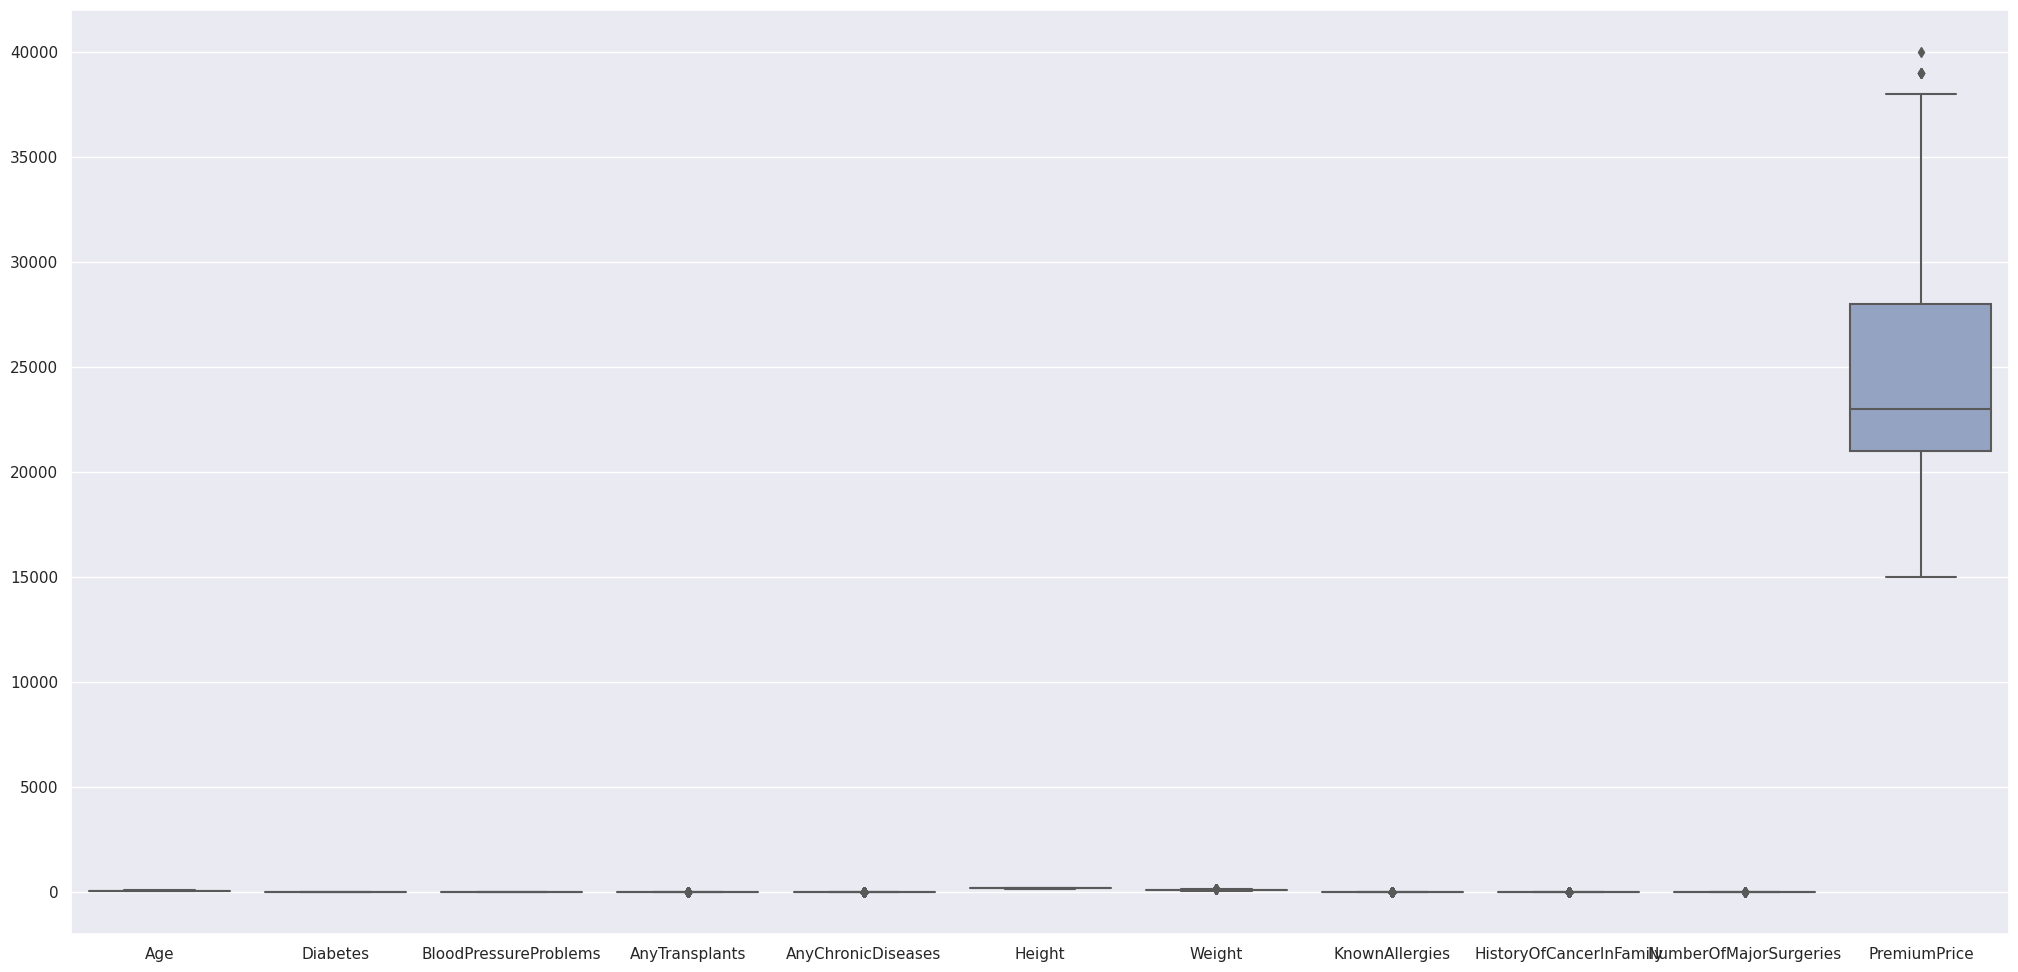

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(25,12)})
ax = sns.boxplot(data=PPDF, orient="v", palette="Set2")

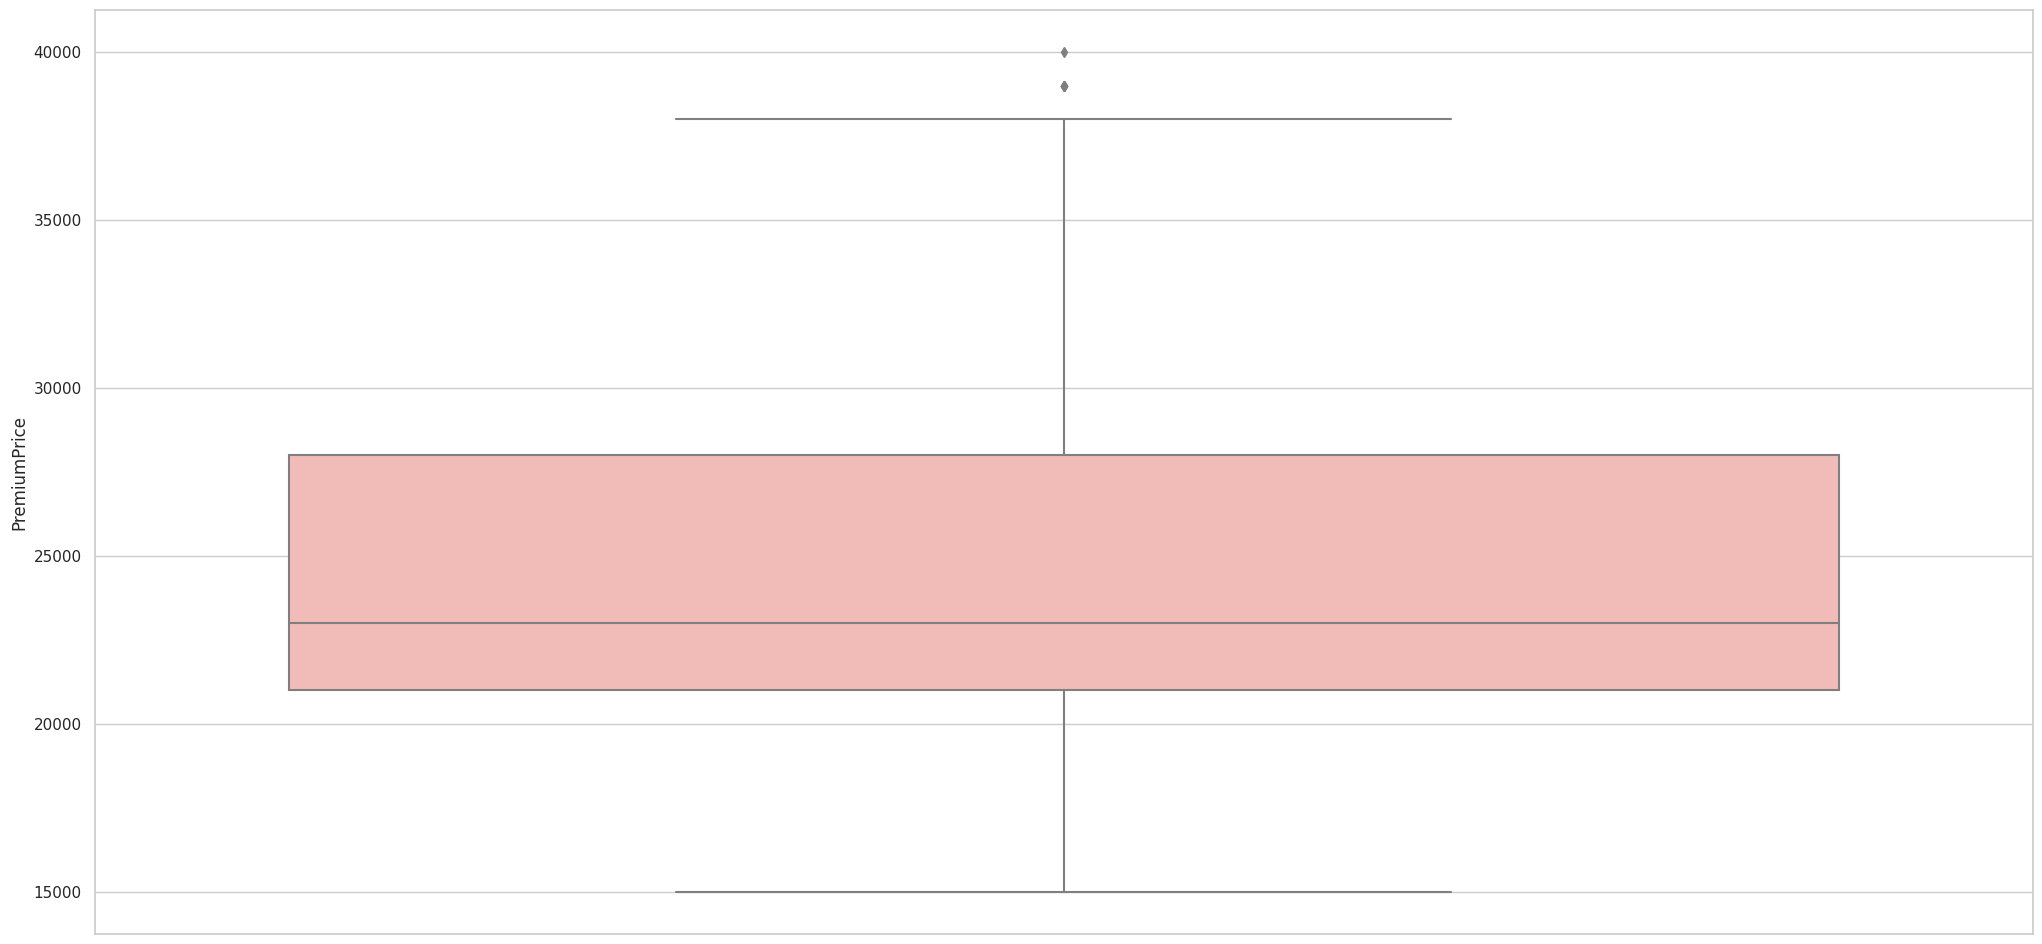

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(y=PPDF[('PremiumPrice')], palette='Pastel1');
plt.show()

Data Wrangling is finished. Dataset is clean and ready for exploratory data analysis

(Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.

Objectives: Handle missing values Correct data format Standardize and normalize data)

In [ ]:
PPDF.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


# **Visualising the data**

## **Univariate analysis**

Dependent variable - premium price of insurance

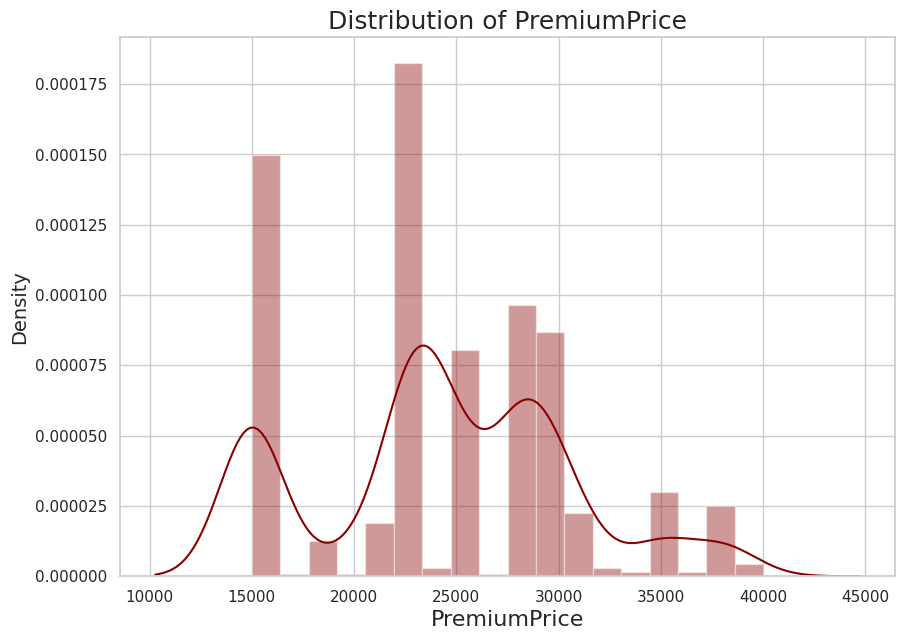

In [ ]:
# depndent variable is 'PremiumPrice'
plt.figure(figsize = (10,7))
sns.distplot(PPDF['PremiumPrice'], color = 'darkred',kde=True)
plt.title('Distribution of PremiumPrice', fontsize=18)
plt.xlabel('PremiumPrice', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

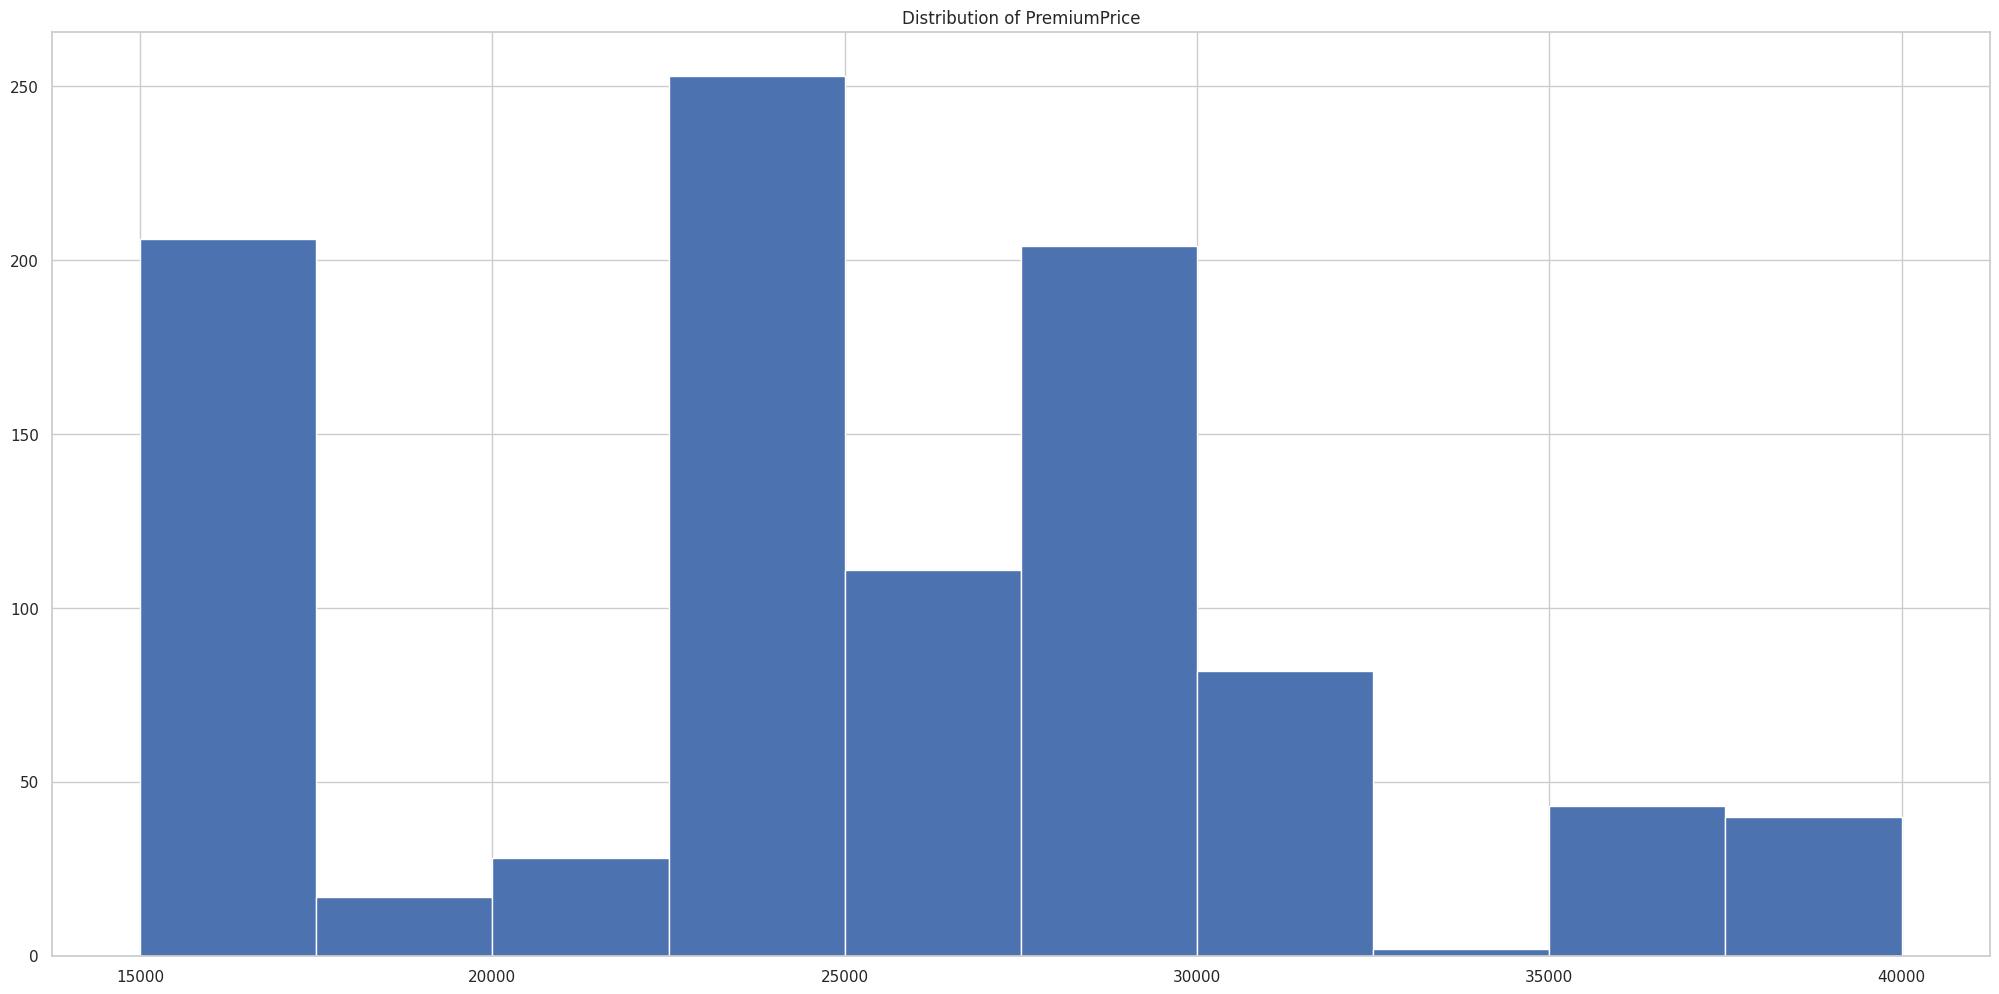

In [ ]:
PPDF.PremiumPrice.hist()
plt.title('Distribution of PremiumPrice');

### **Checking the distribution of variables using KDE plot**

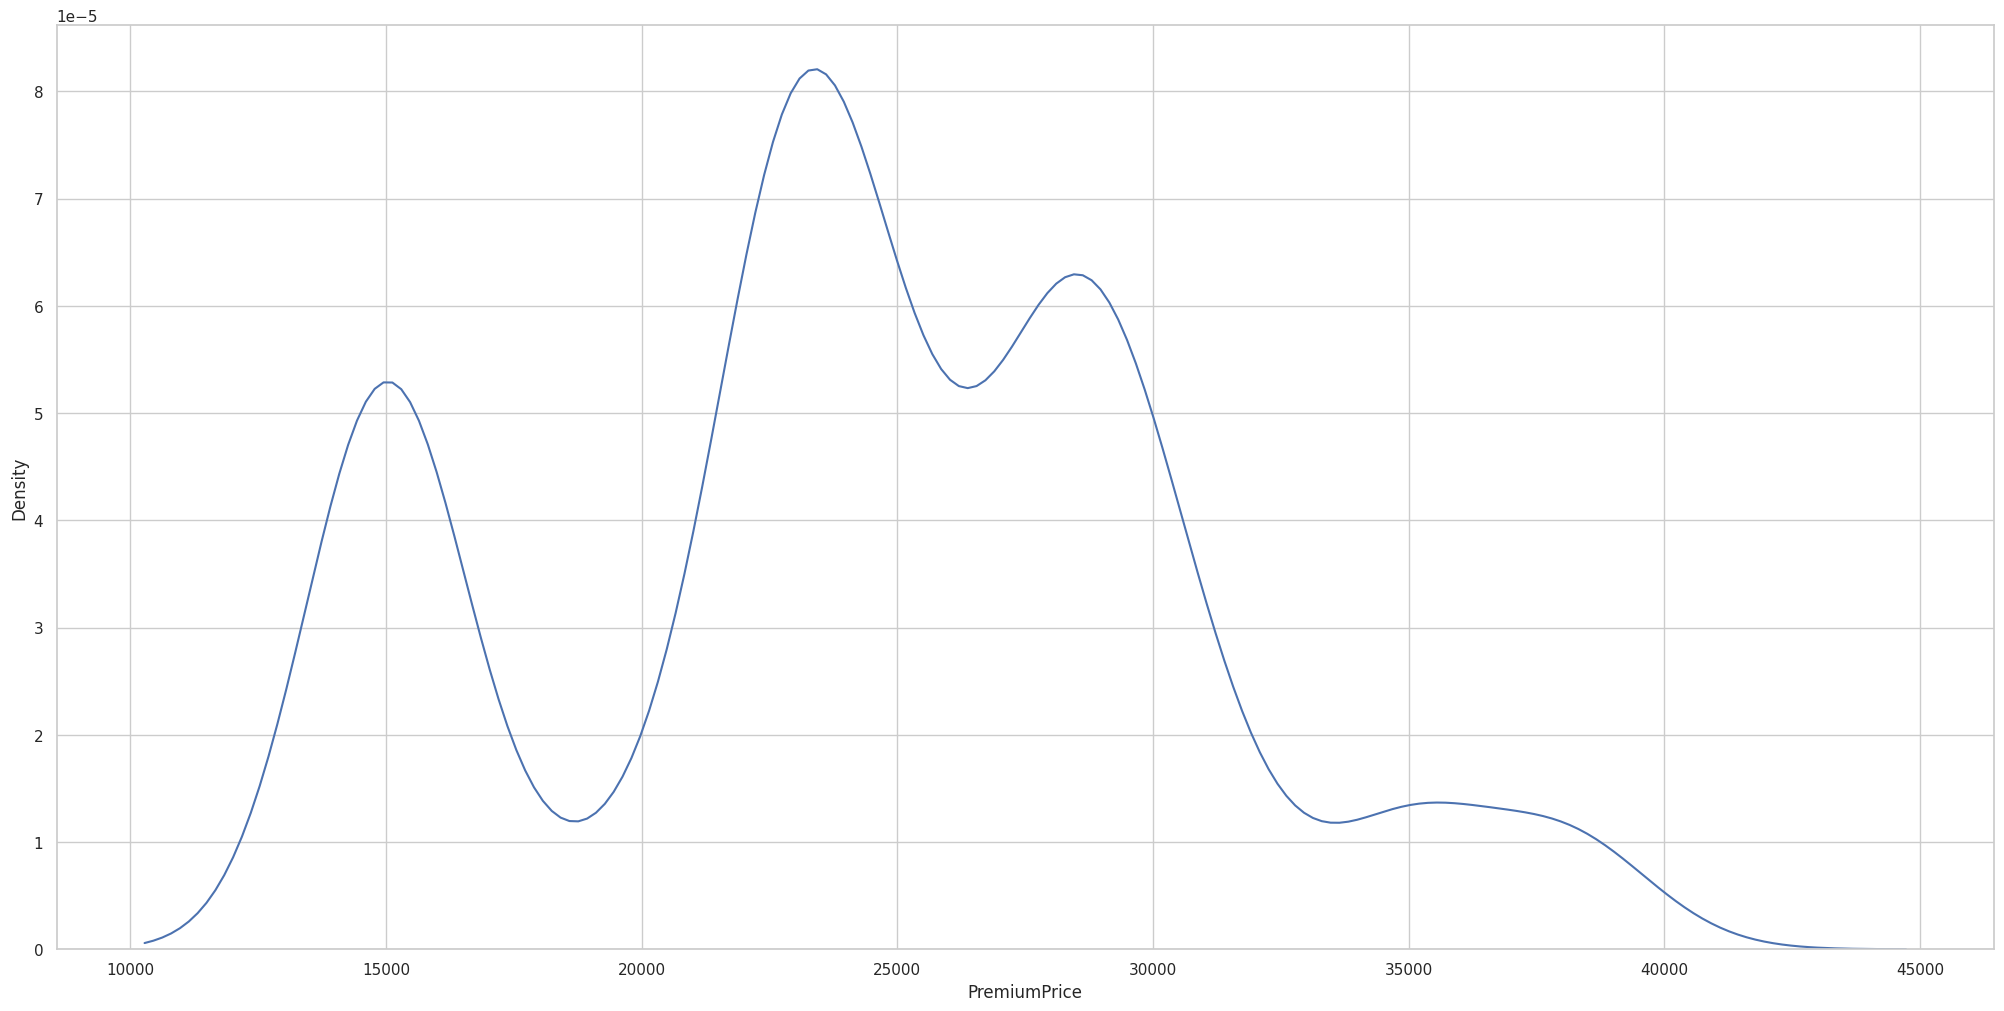

In [ ]:
sns.kdeplot(PPDF.PremiumPrice);

### **Checking the distribution of variables using a Q-Q plot**

In [ ]:
#importing necessary libraries
import scipy.stats as stats
import pylab

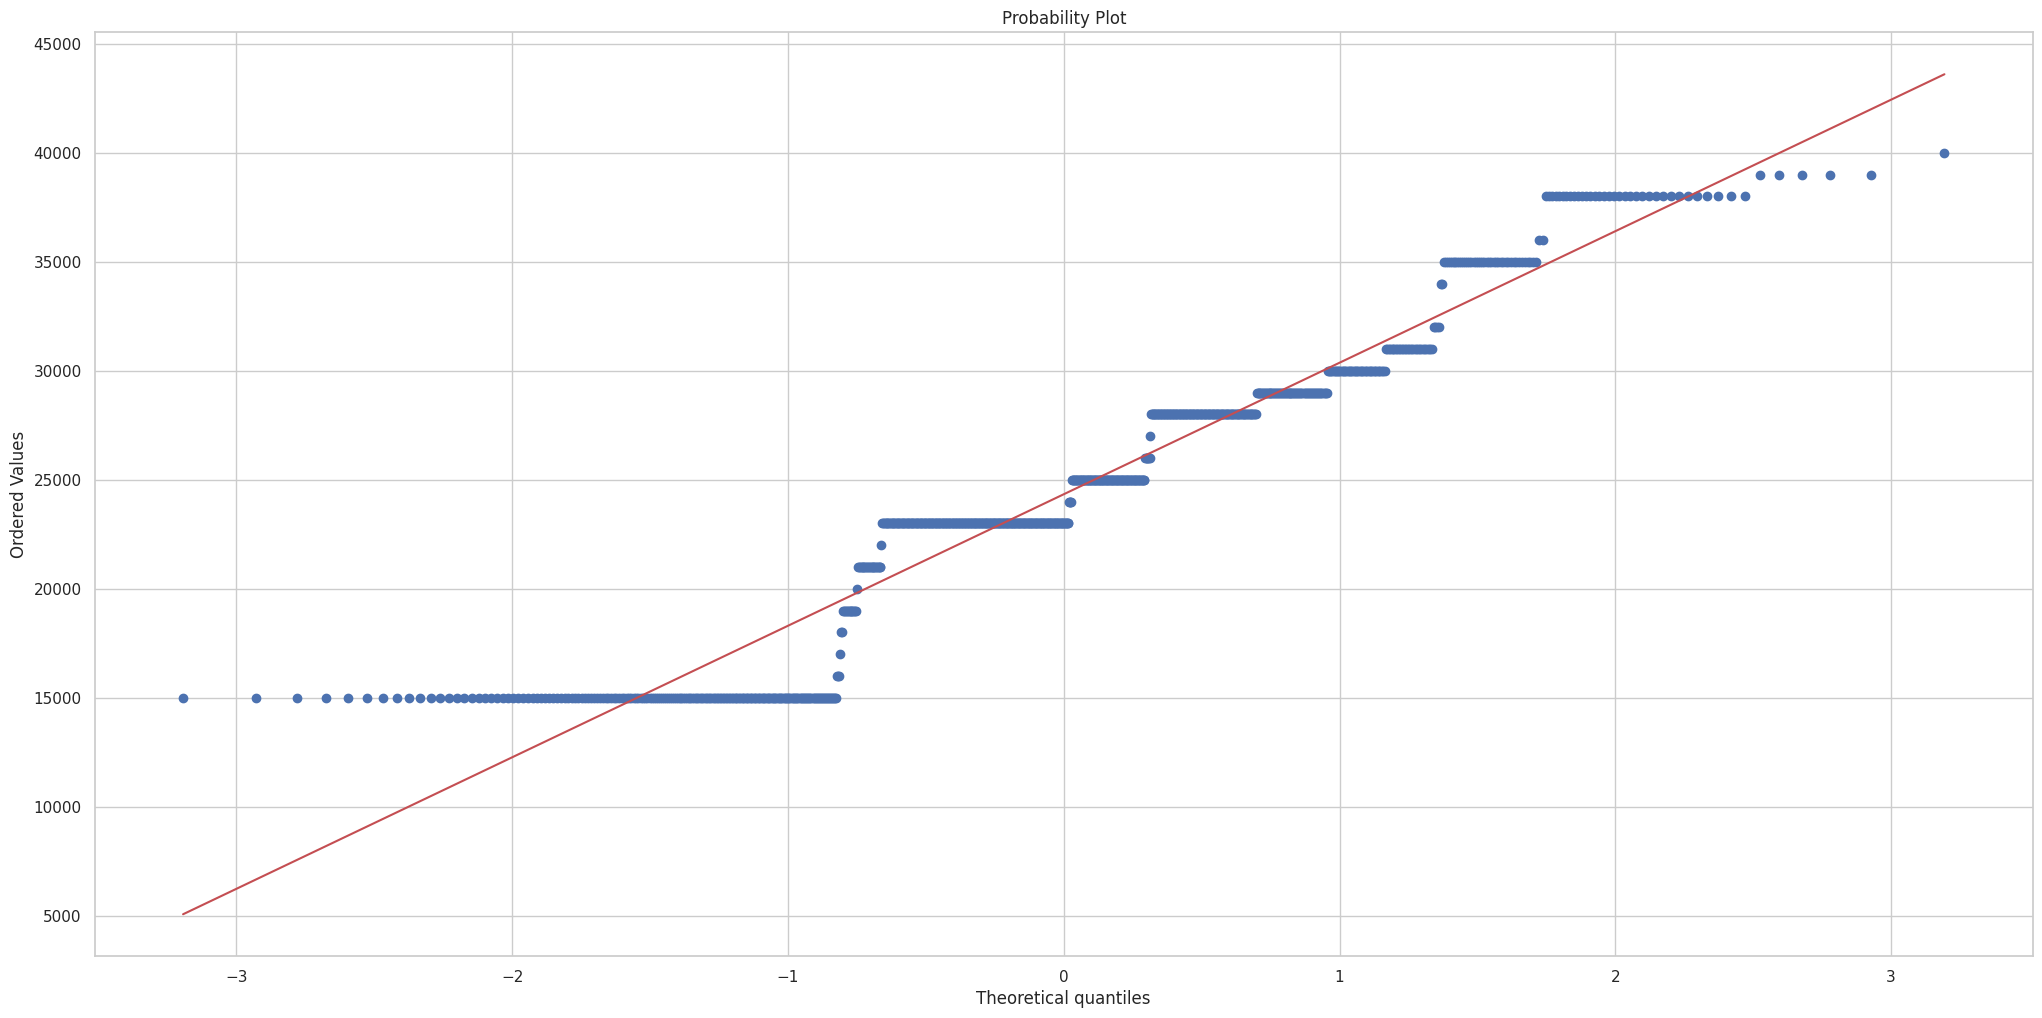

In [ ]:
stats.probplot(PPDF.PremiumPrice,plot=pylab);

## **Independent Variables Age , Height and Weight**
Plotting distribution of Age , Height and Weight

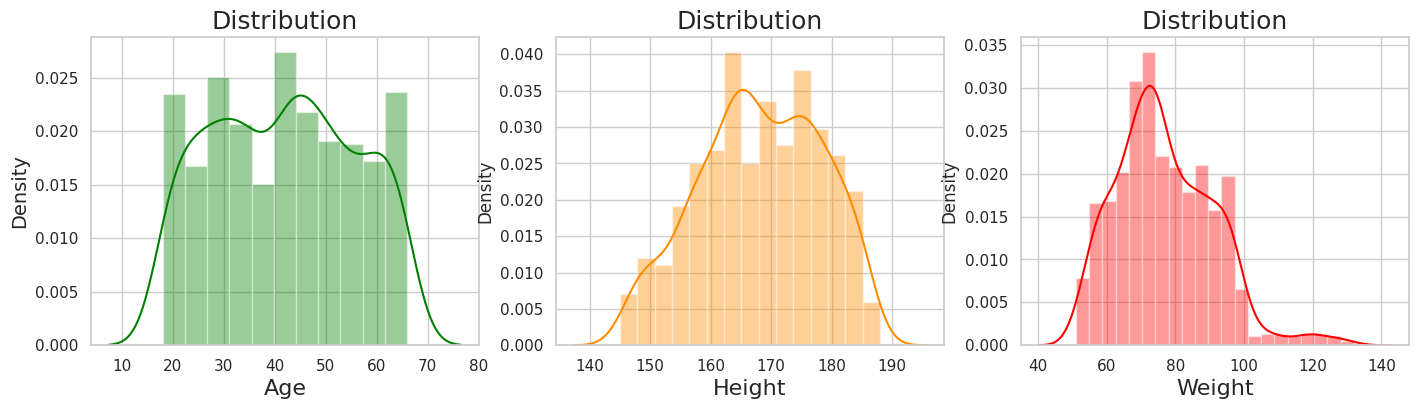

In [ ]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(PPDF['Age'], color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Age', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(PPDF['Height'], color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('Height', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(PPDF['Weight'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Weight', fontsize= 16)

plt.show()


### **Categorical data visualisation**

Count plot with data labels 

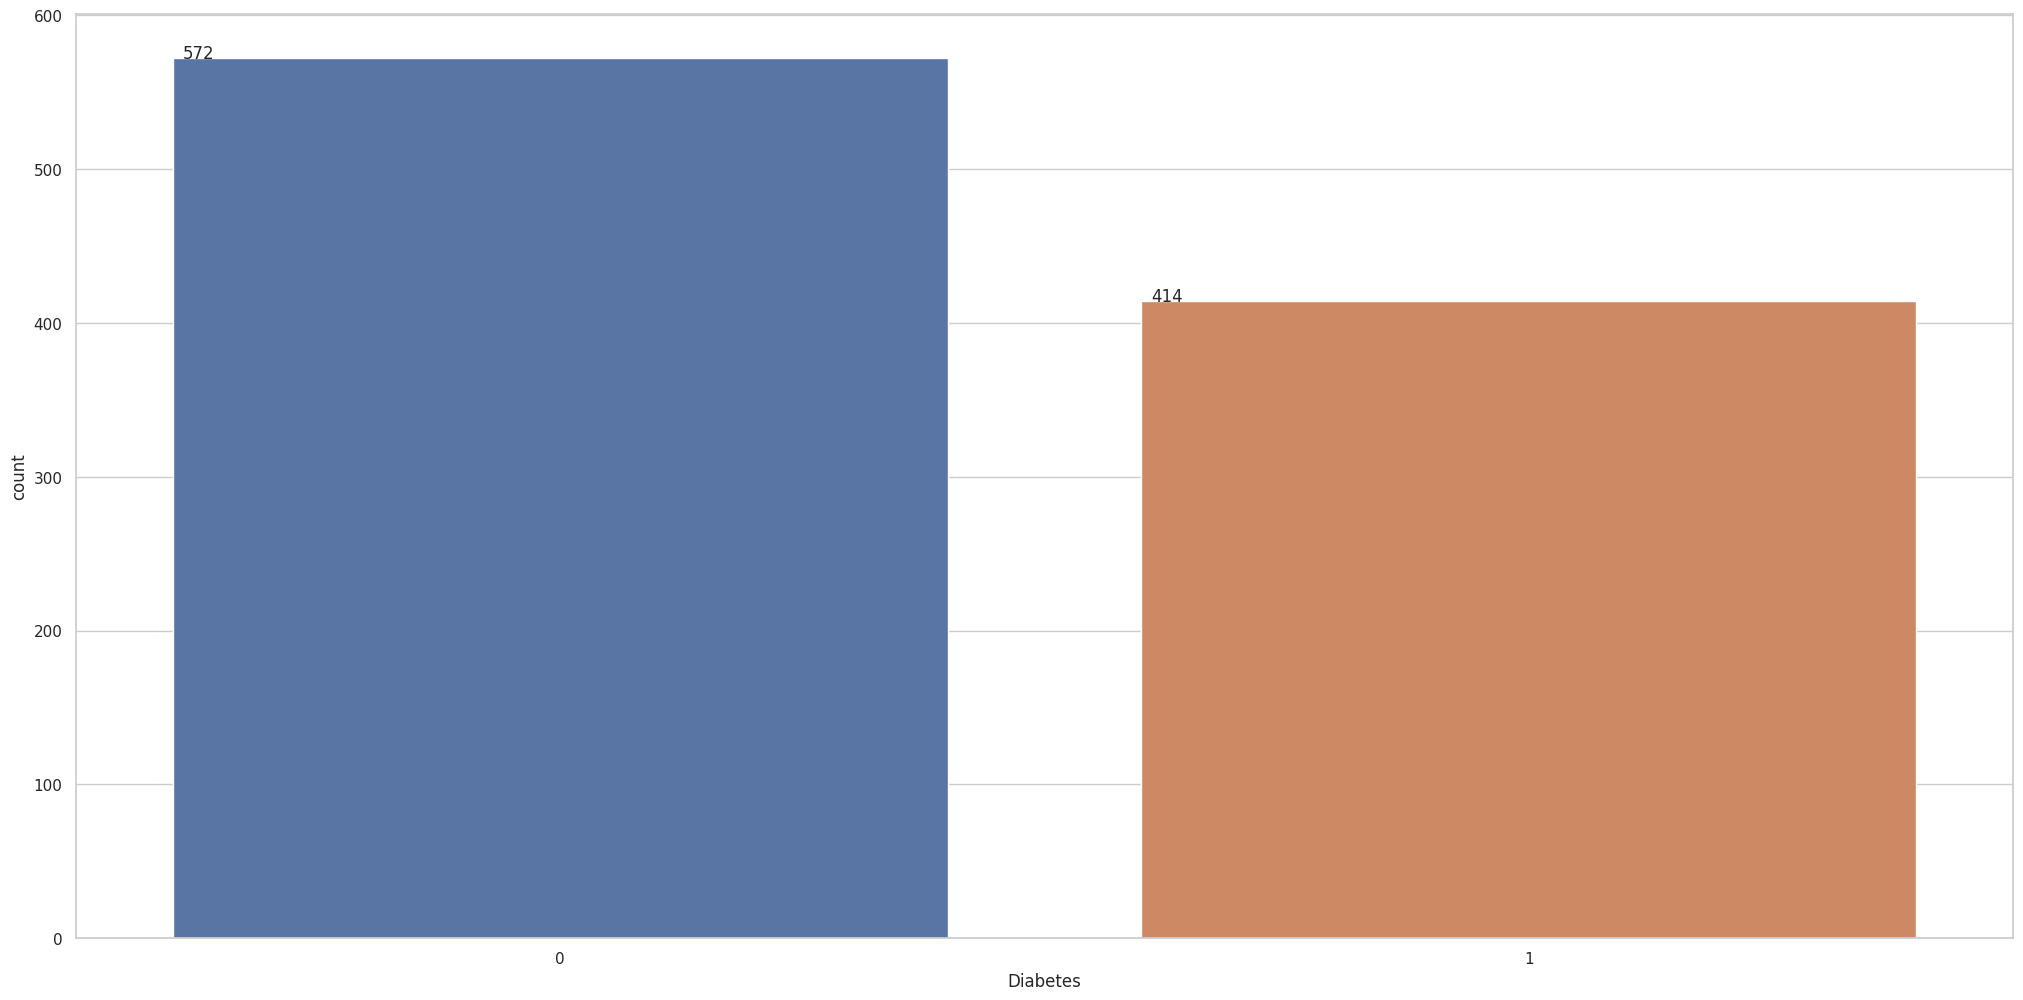

In [ ]:
ax = sns.countplot(x="Diabetes", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


Count plot with data labels

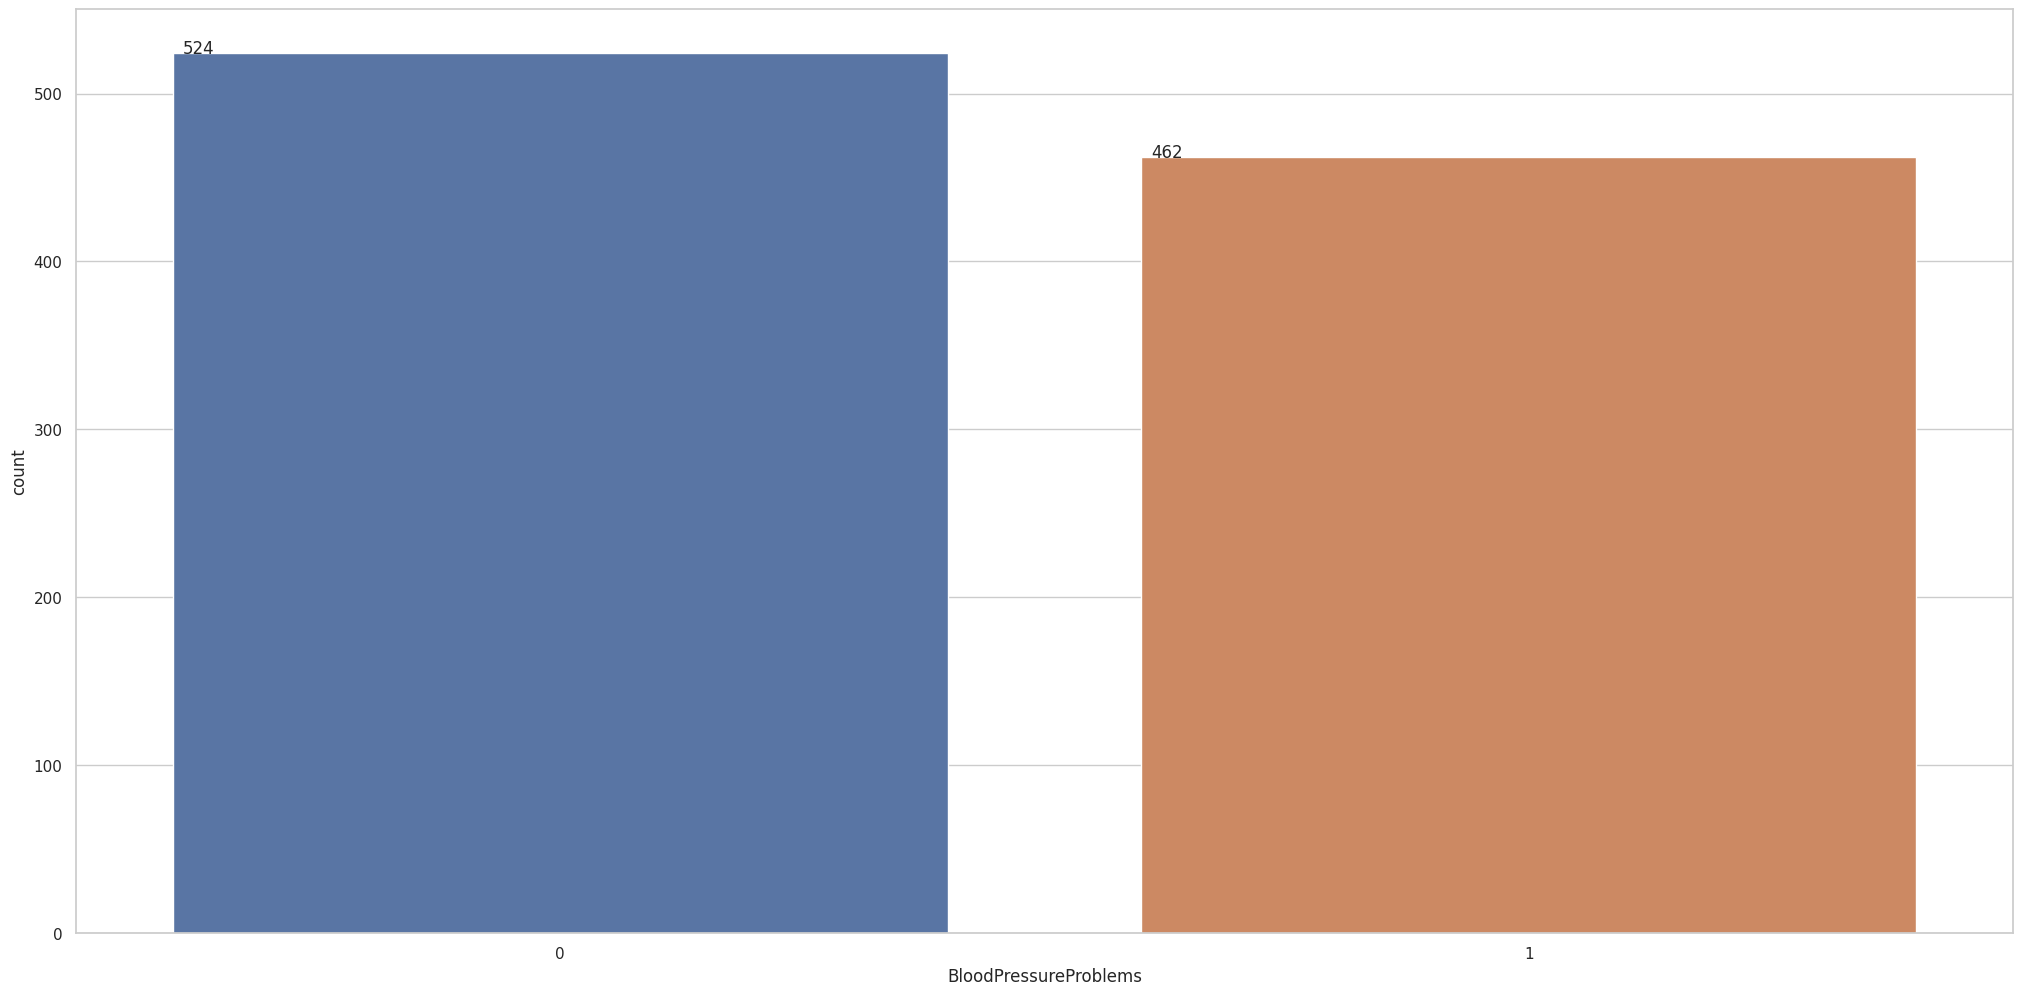

In [ ]:
ax = sns.countplot(x="BloodPressureProblems", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


Count plot with data labels

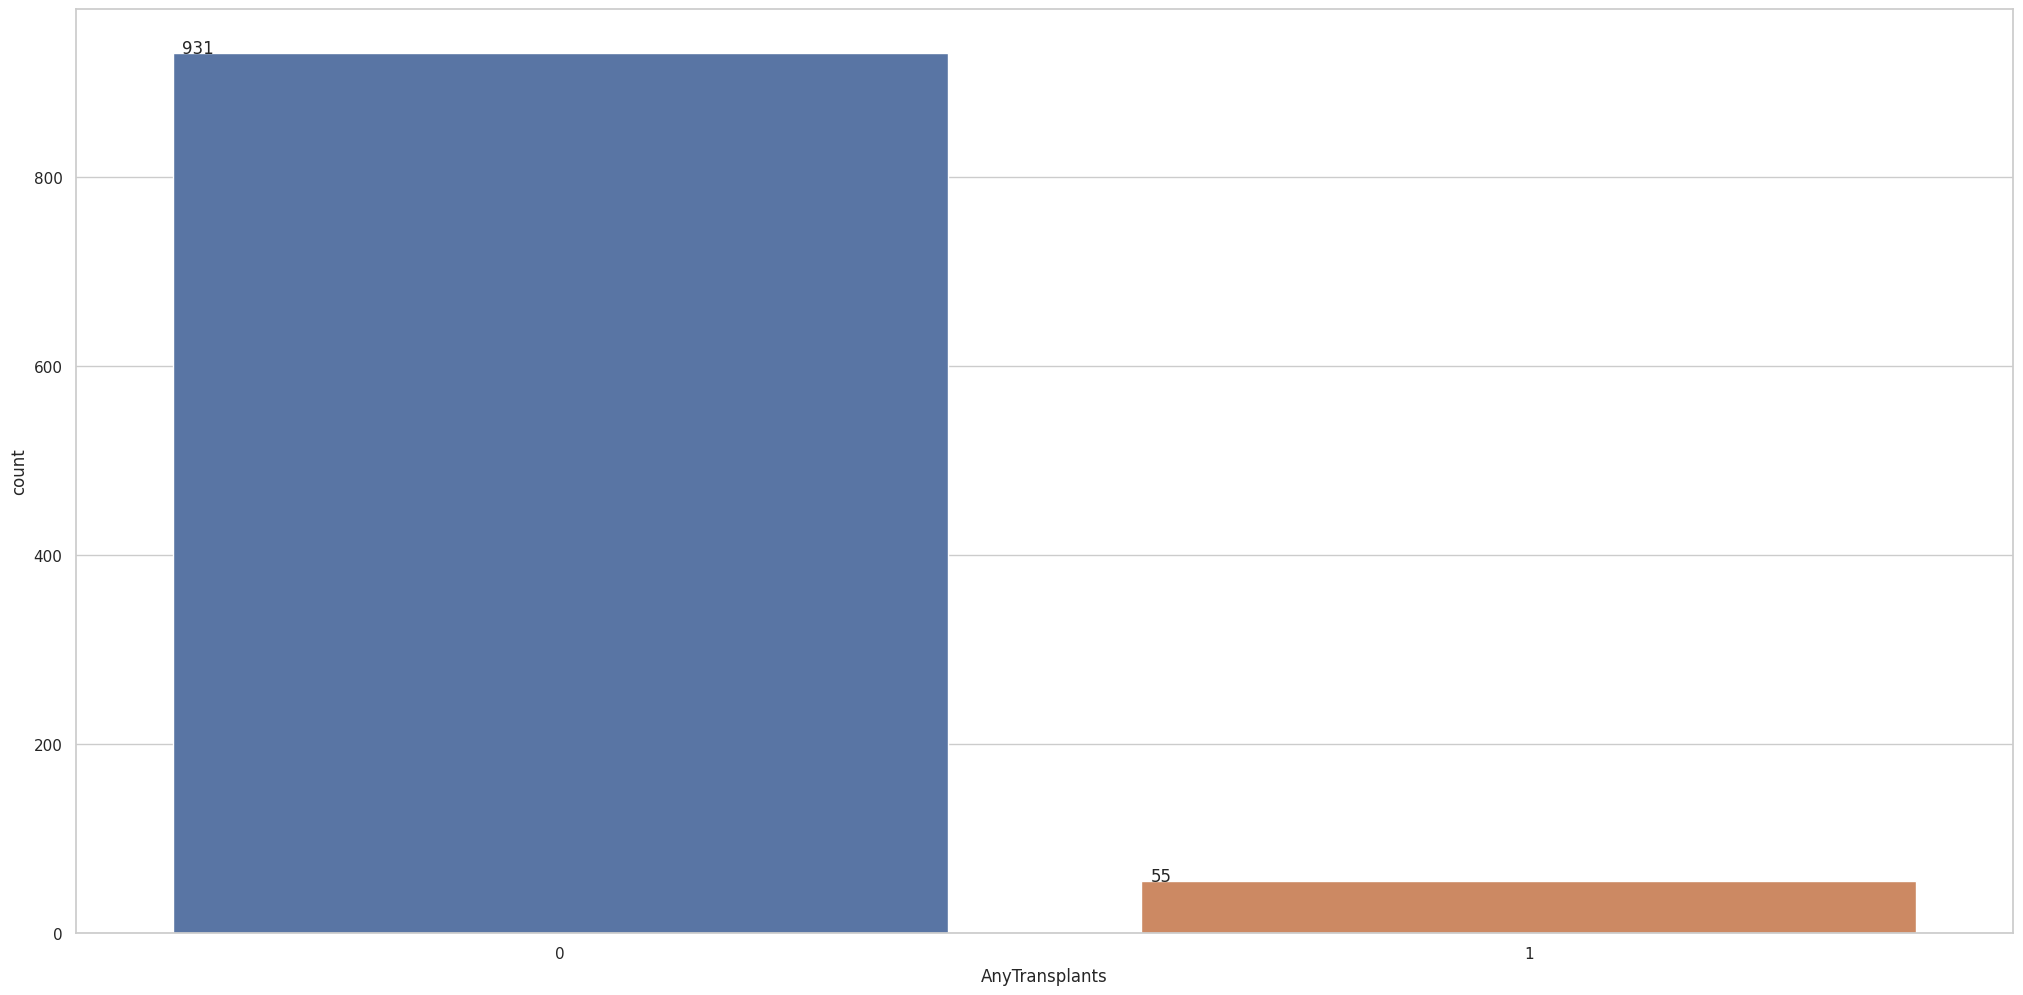

In [ ]:
ax = sns.countplot(x="AnyTransplants", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


Count plot with data labels

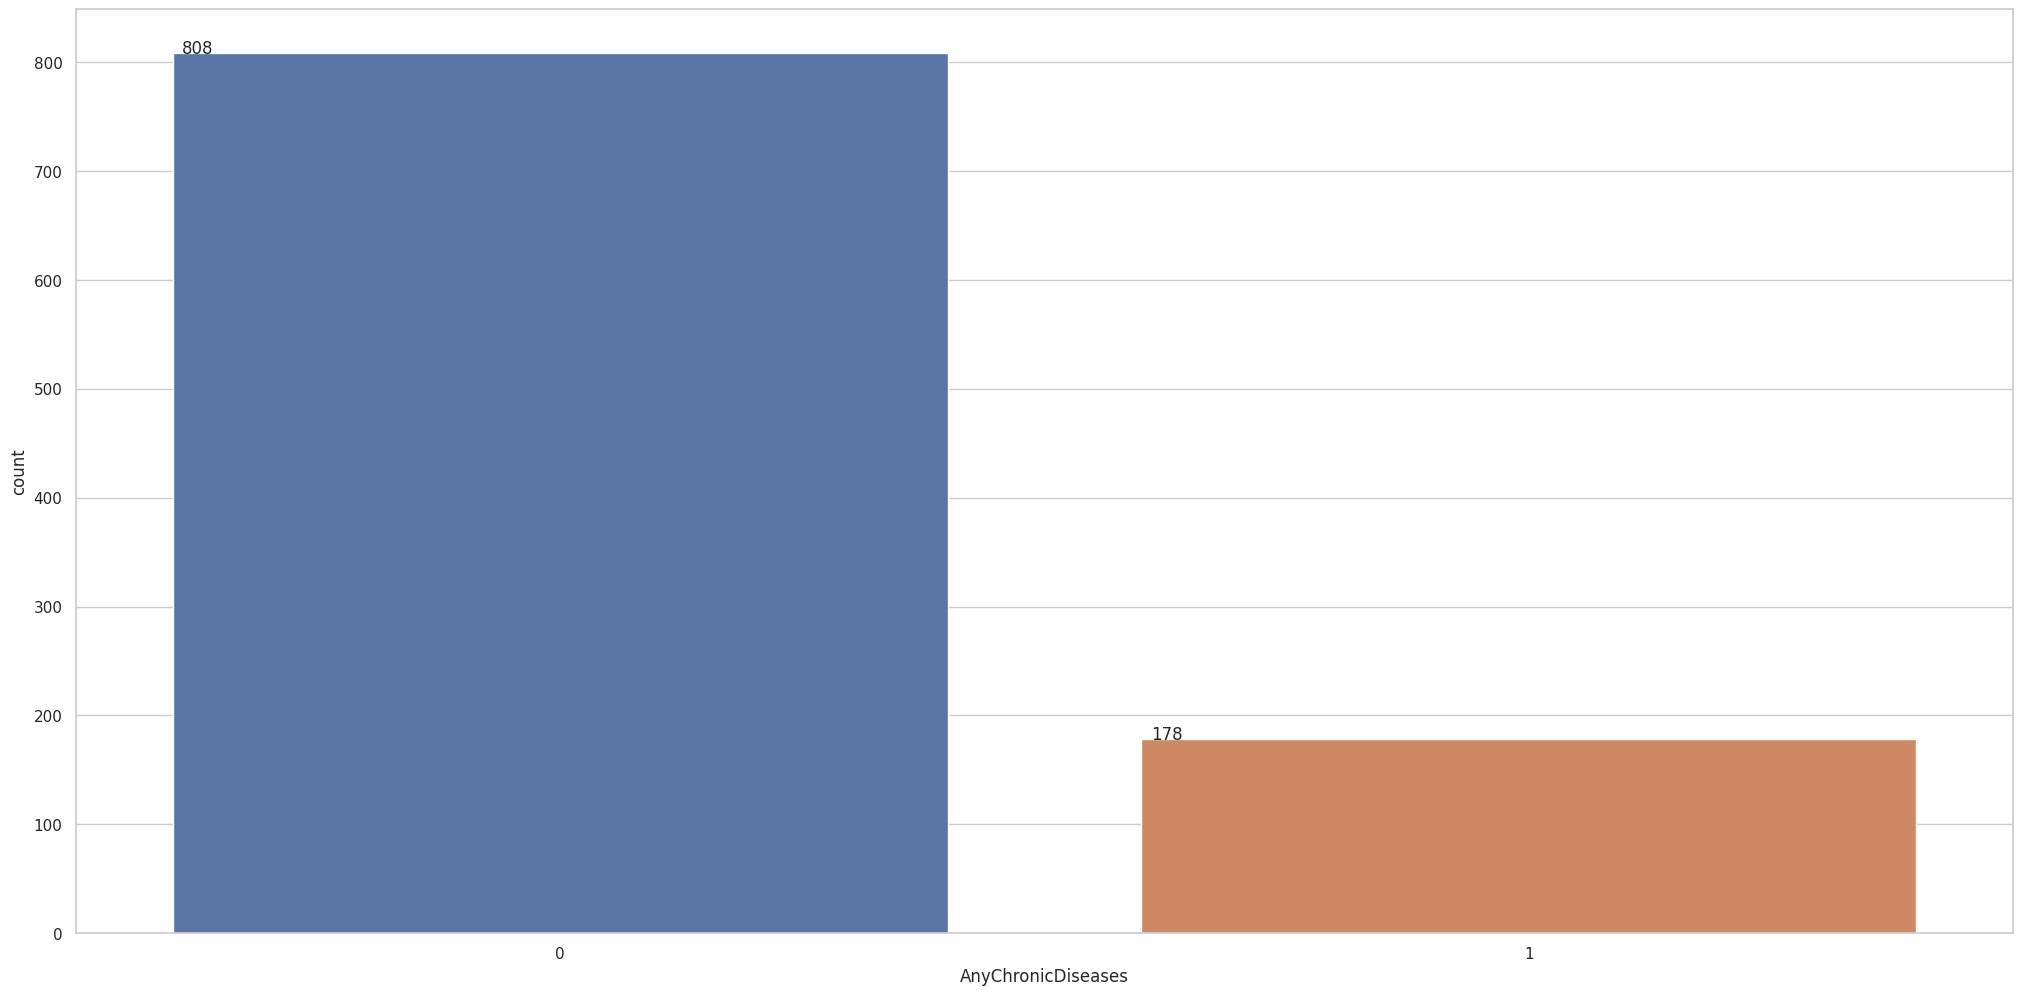

In [ ]:
ax = sns.countplot(x="AnyChronicDiseases", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

Count plot with data labels

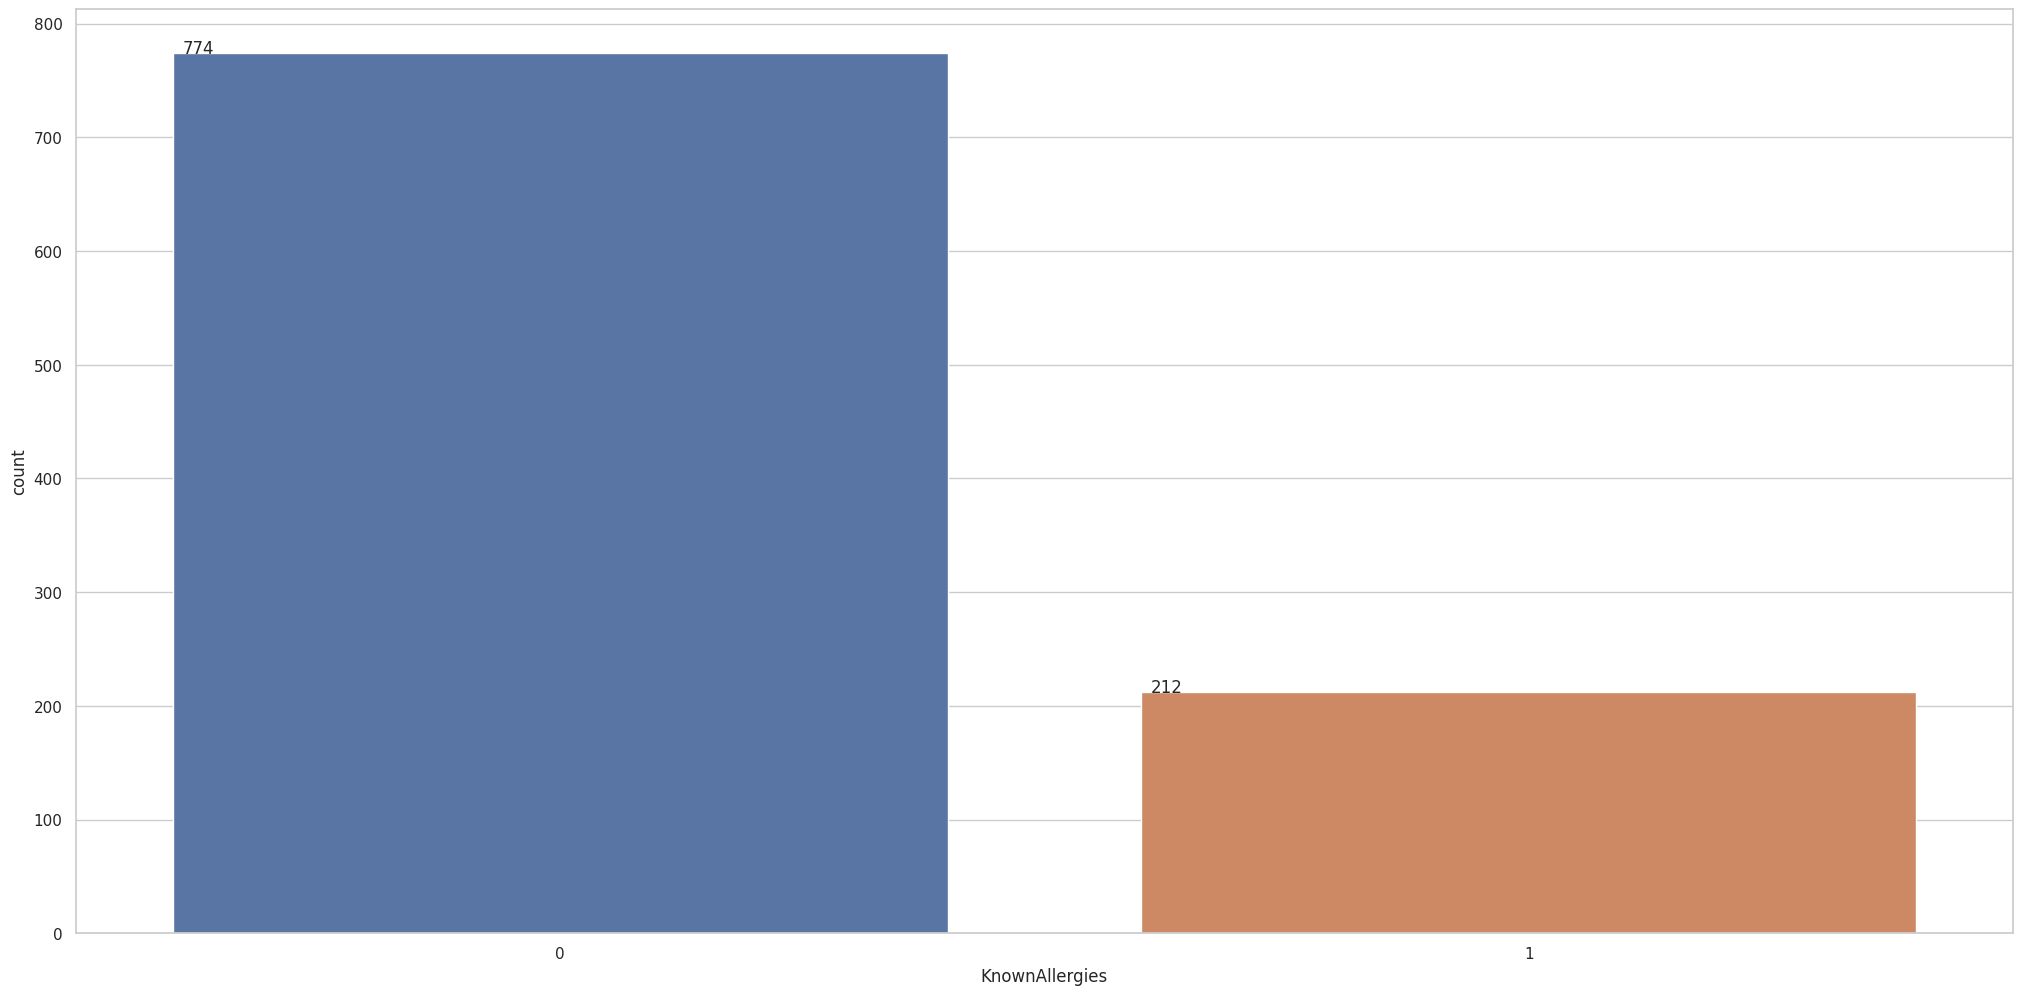

In [ ]:
ax = sns.countplot(x="KnownAllergies", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

Count plot with data labels

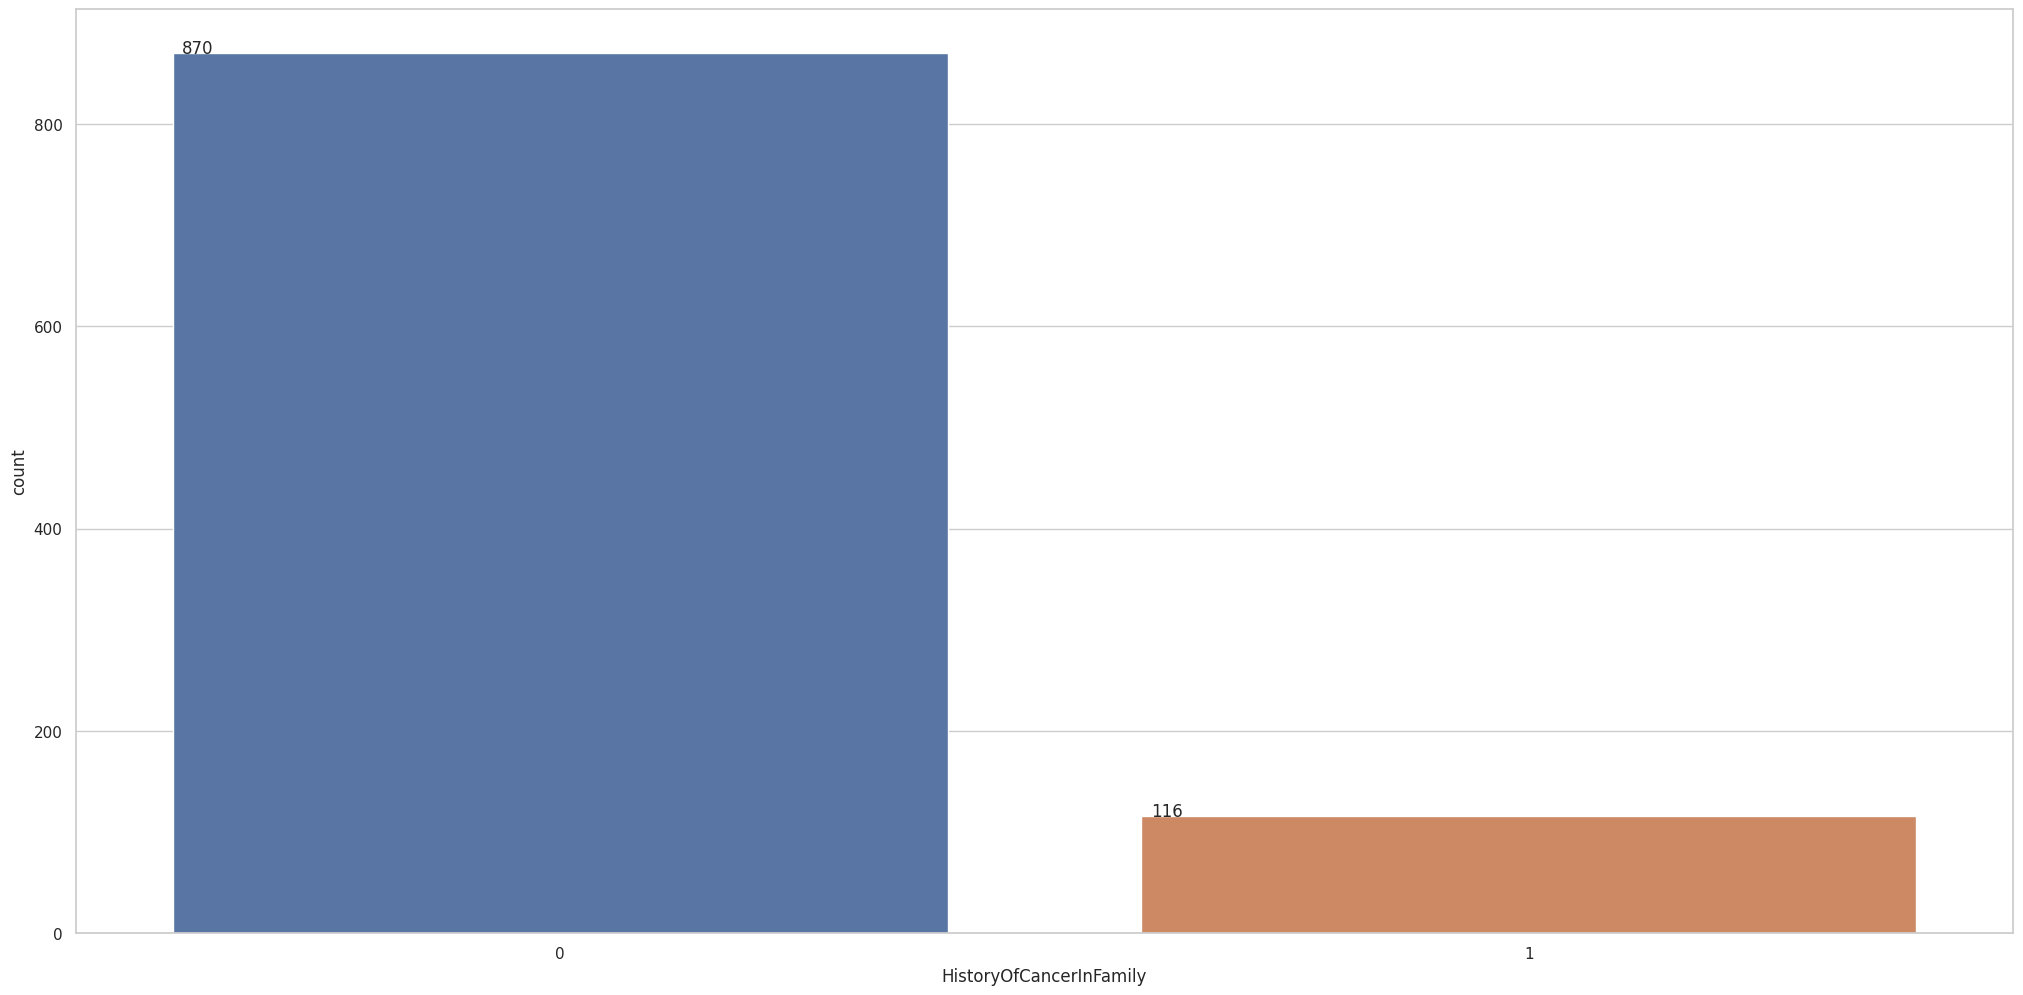

In [ ]:
ax = sns.countplot(x="HistoryOfCancerInFamily", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

Count plot with data labels

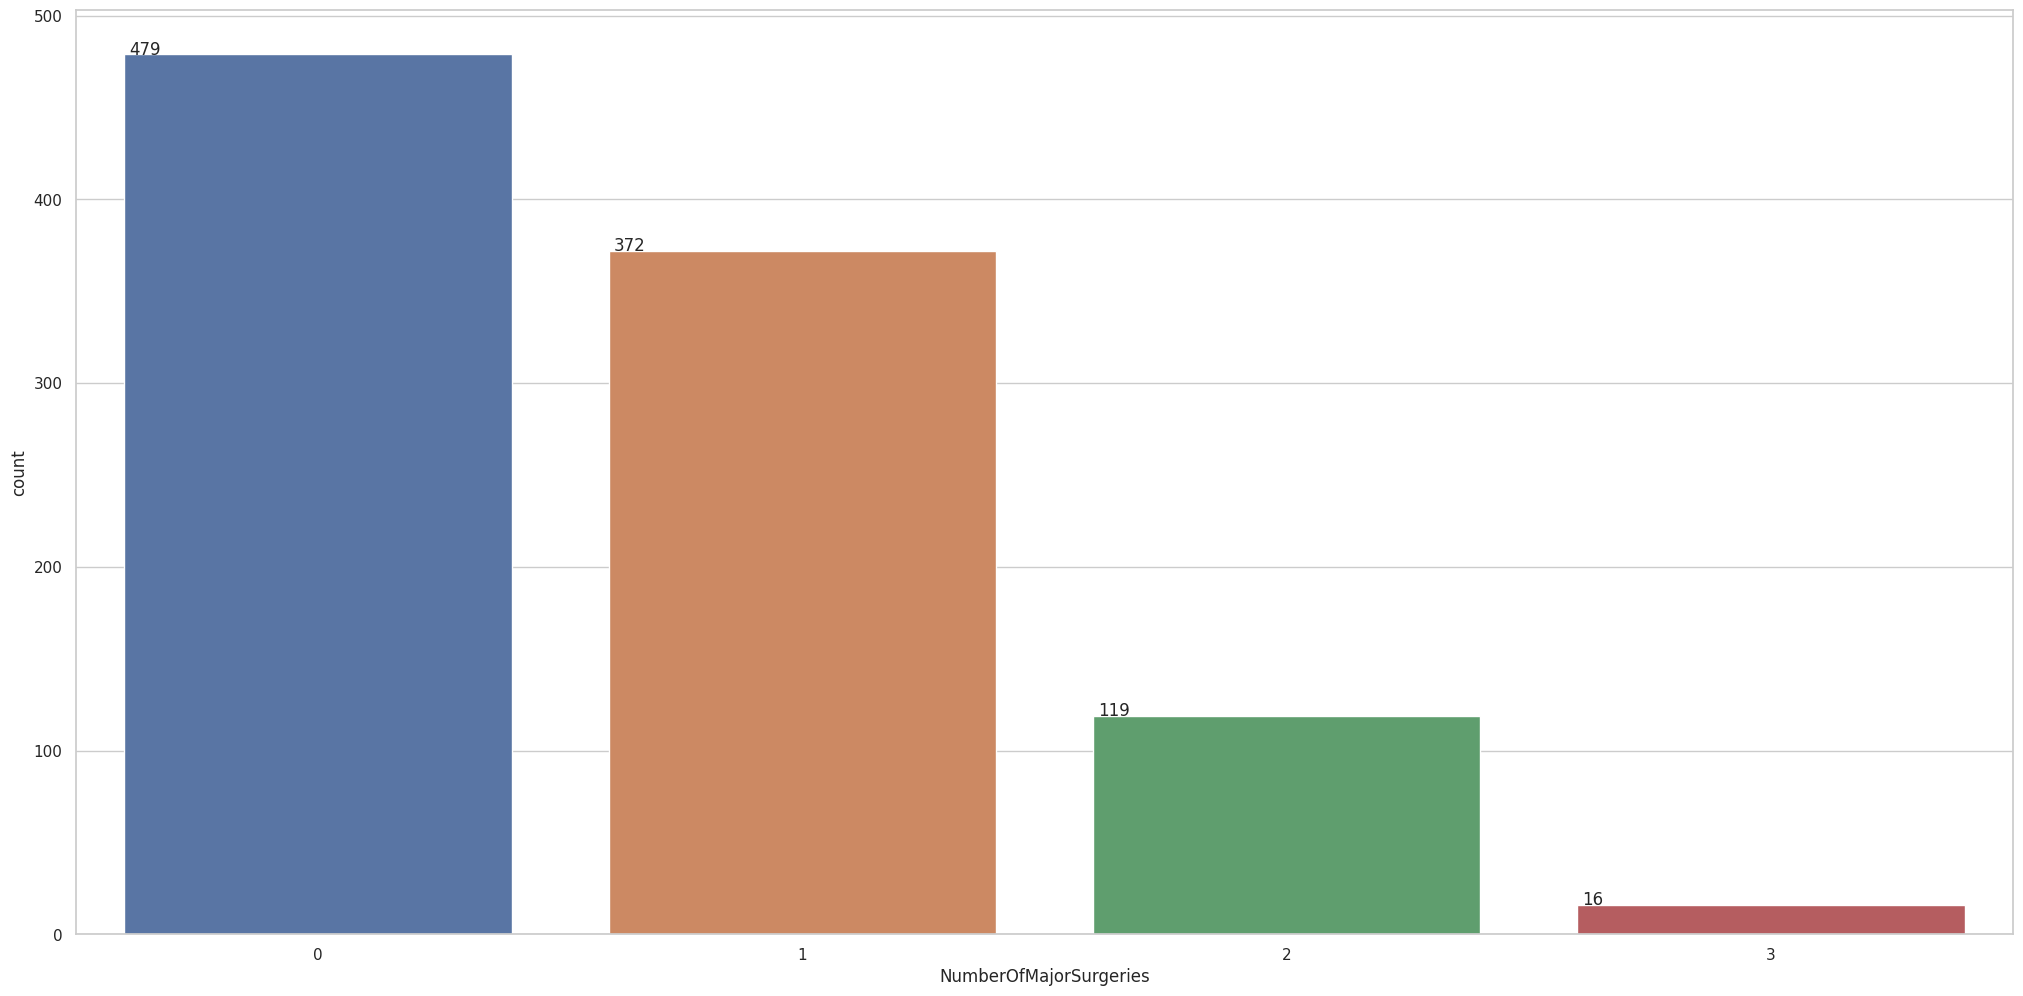

In [ ]:
ax = sns.countplot(x="NumberOfMajorSurgeries", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

## **Multivariate analysis**

PremiumPrice vs Other Variables

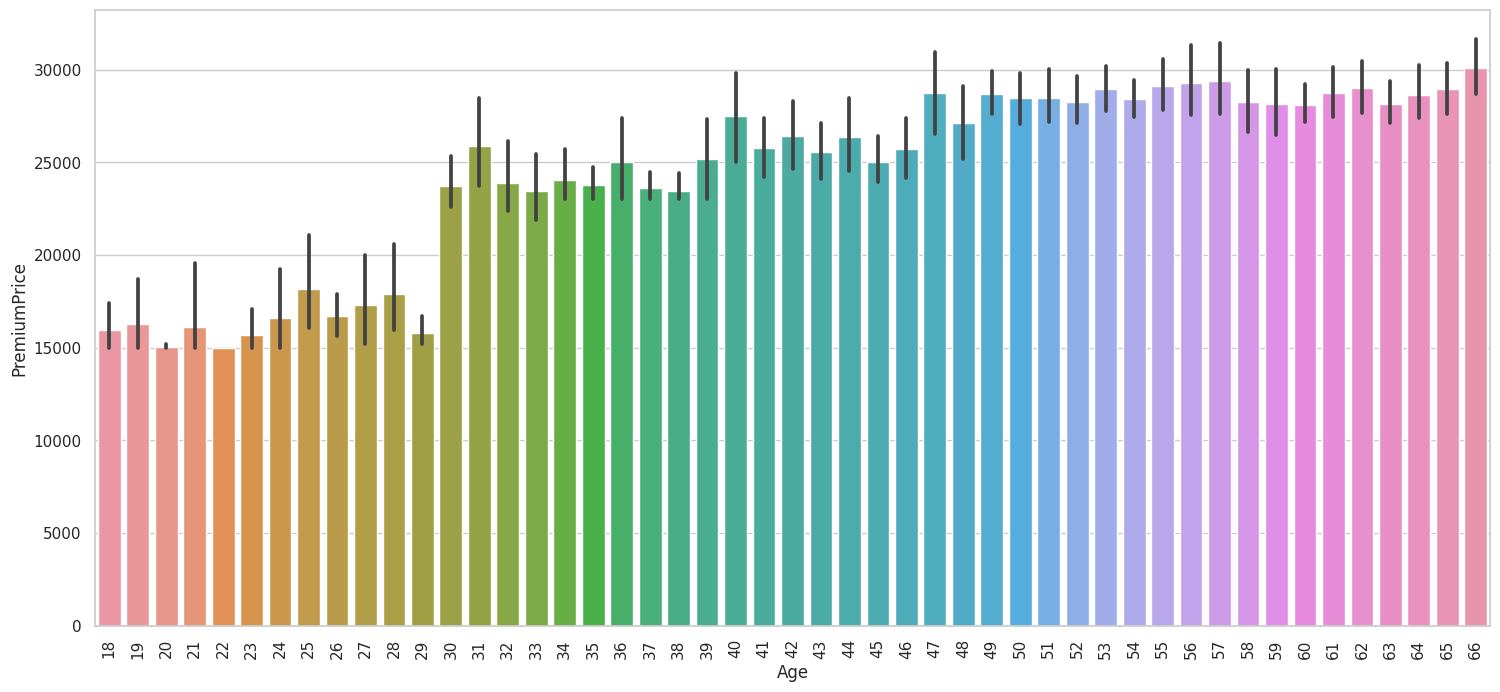

In [ ]:
# PremiumPrice vs Age
plt.figure(figsize = (18,8))
plt.xticks(rotation=90)
sns.barplot(x="Age", y="PremiumPrice", data=PPDF)
plt.show()

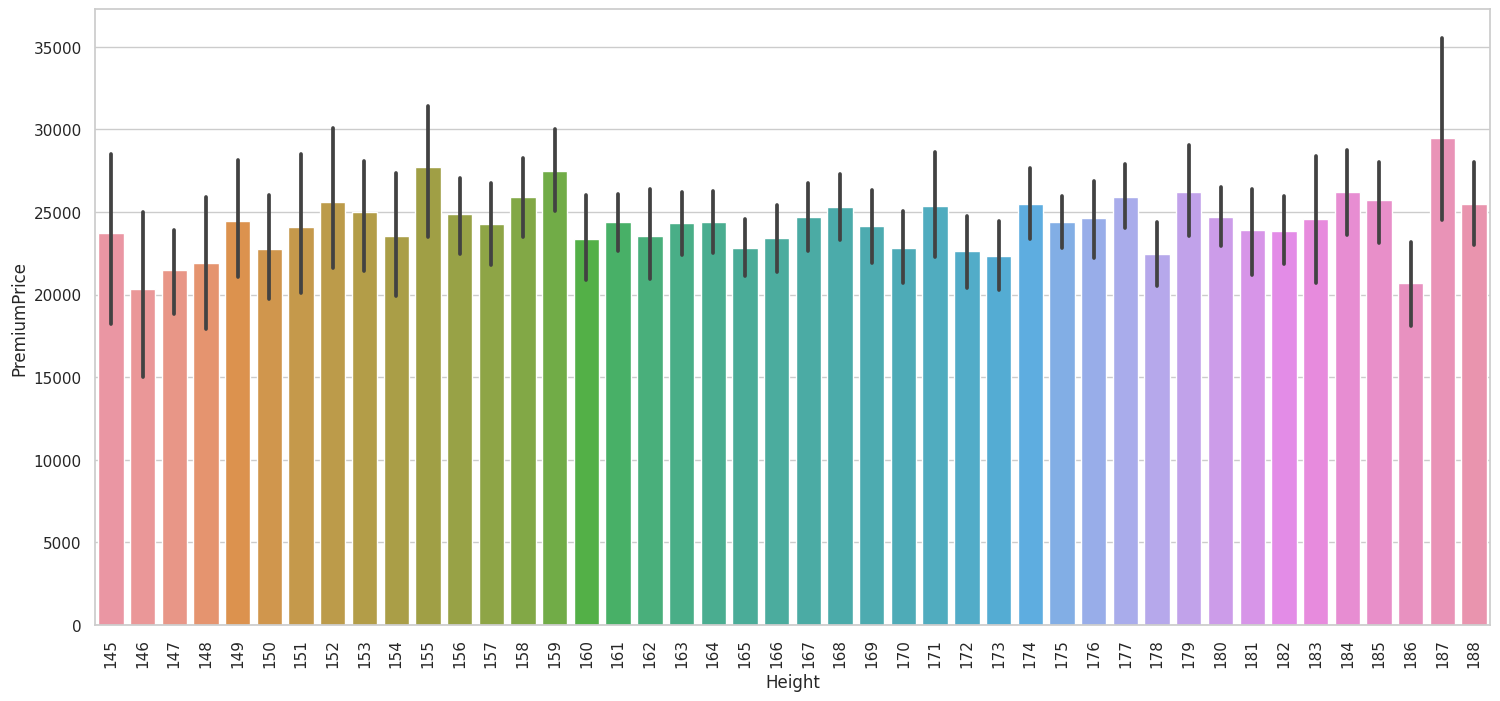

In [ ]:
# PremiumPrice vs Height
plt.figure(figsize = (18,8))
plt.xticks(rotation=90)
sns.barplot(x="Height", y="PremiumPrice", data=PPDF)
plt.show()

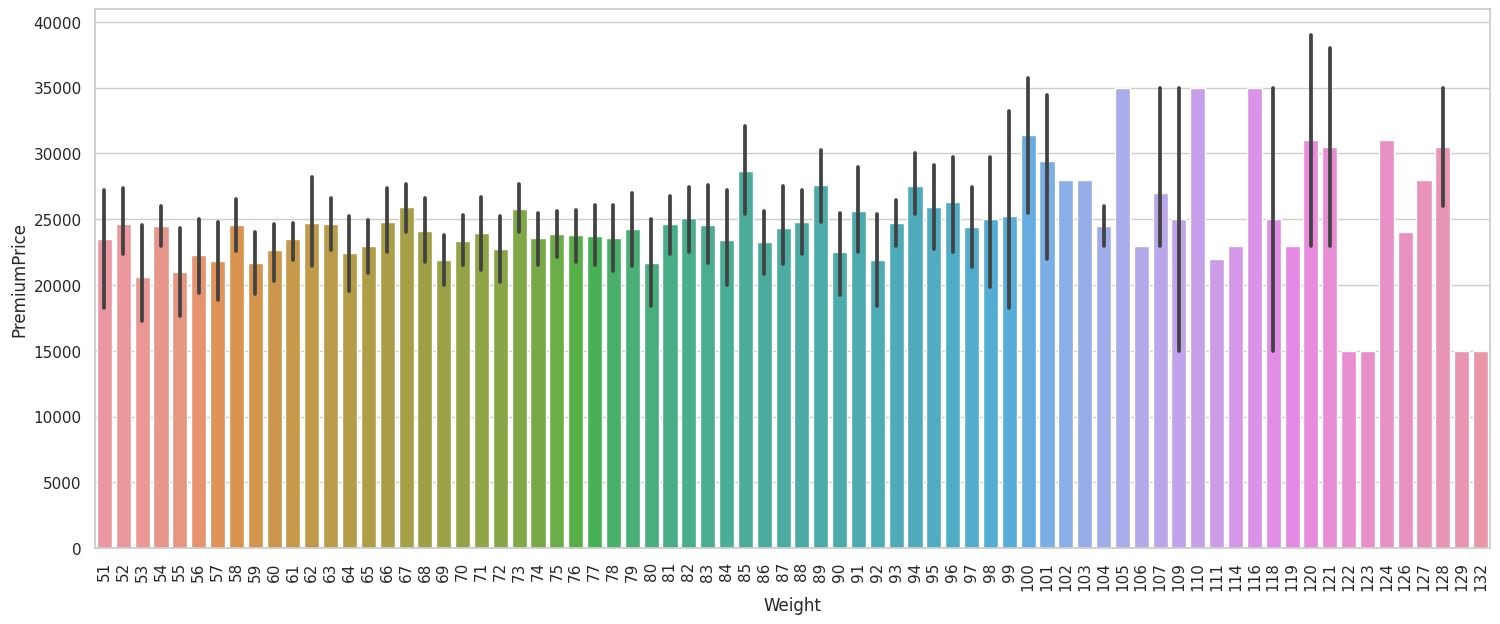

In [ ]:
# PremiumPrice vs Weight
plt.figure(figsize = (18,7))
plt.xticks(rotation=90)
sns.barplot(x="Weight", y="PremiumPrice", data=PPDF)
plt.show()

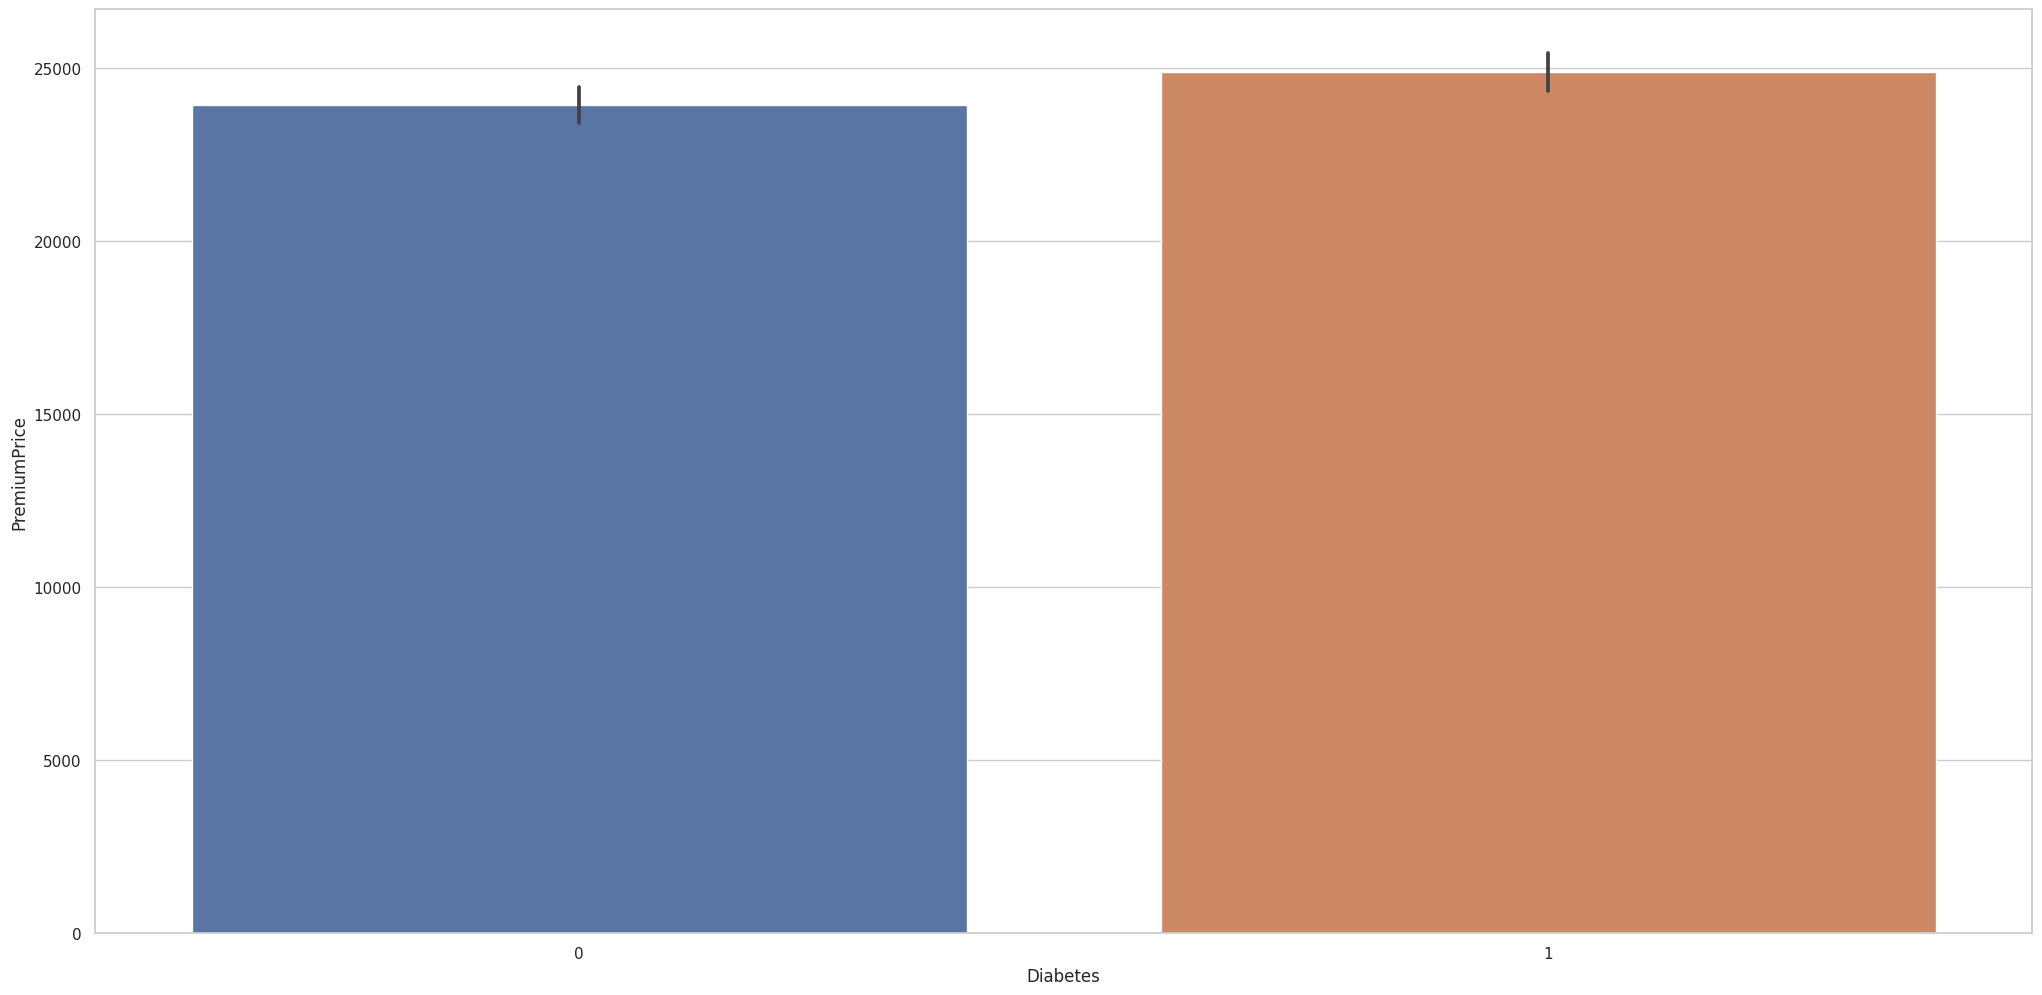

In [ ]:
sns.barplot(x="Diabetes", y="PremiumPrice", data=PPDF)
plt.show()

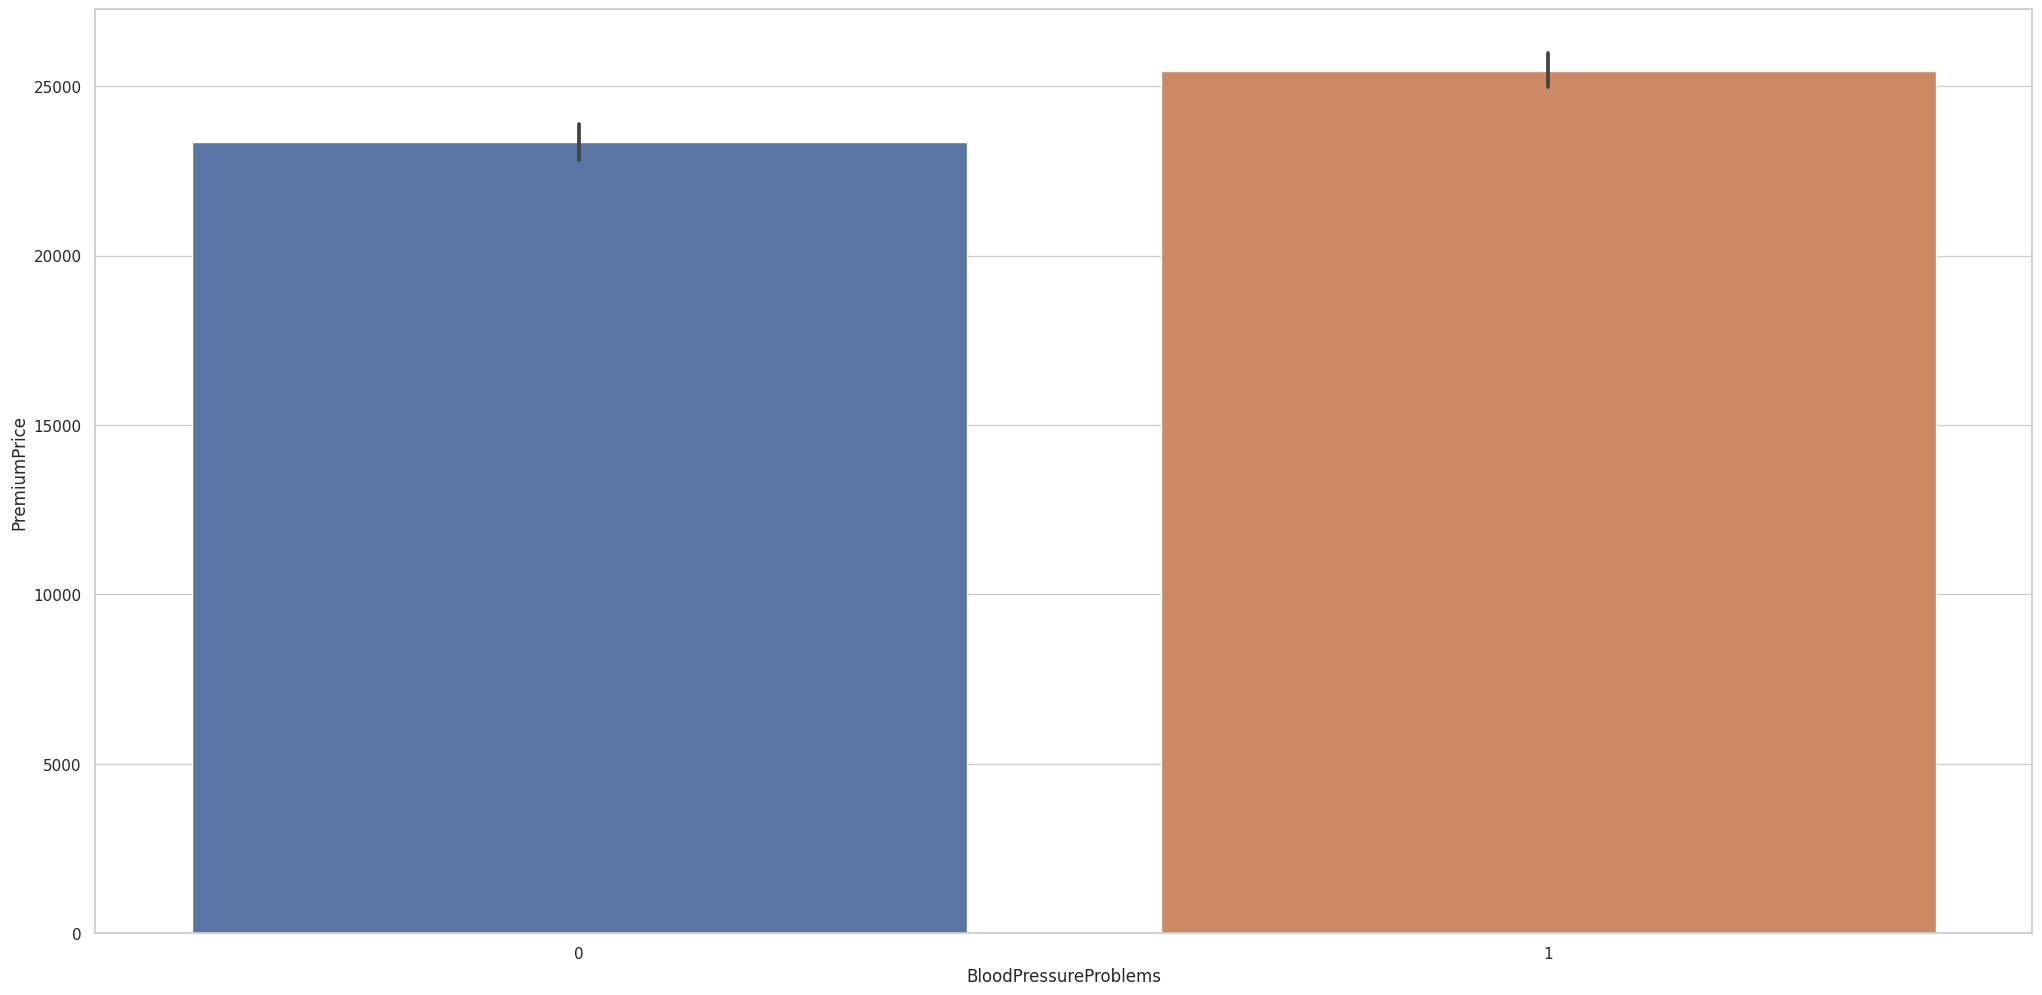

In [ ]:
sns.barplot(x="BloodPressureProblems", y="PremiumPrice", data=PPDF)
plt.show()

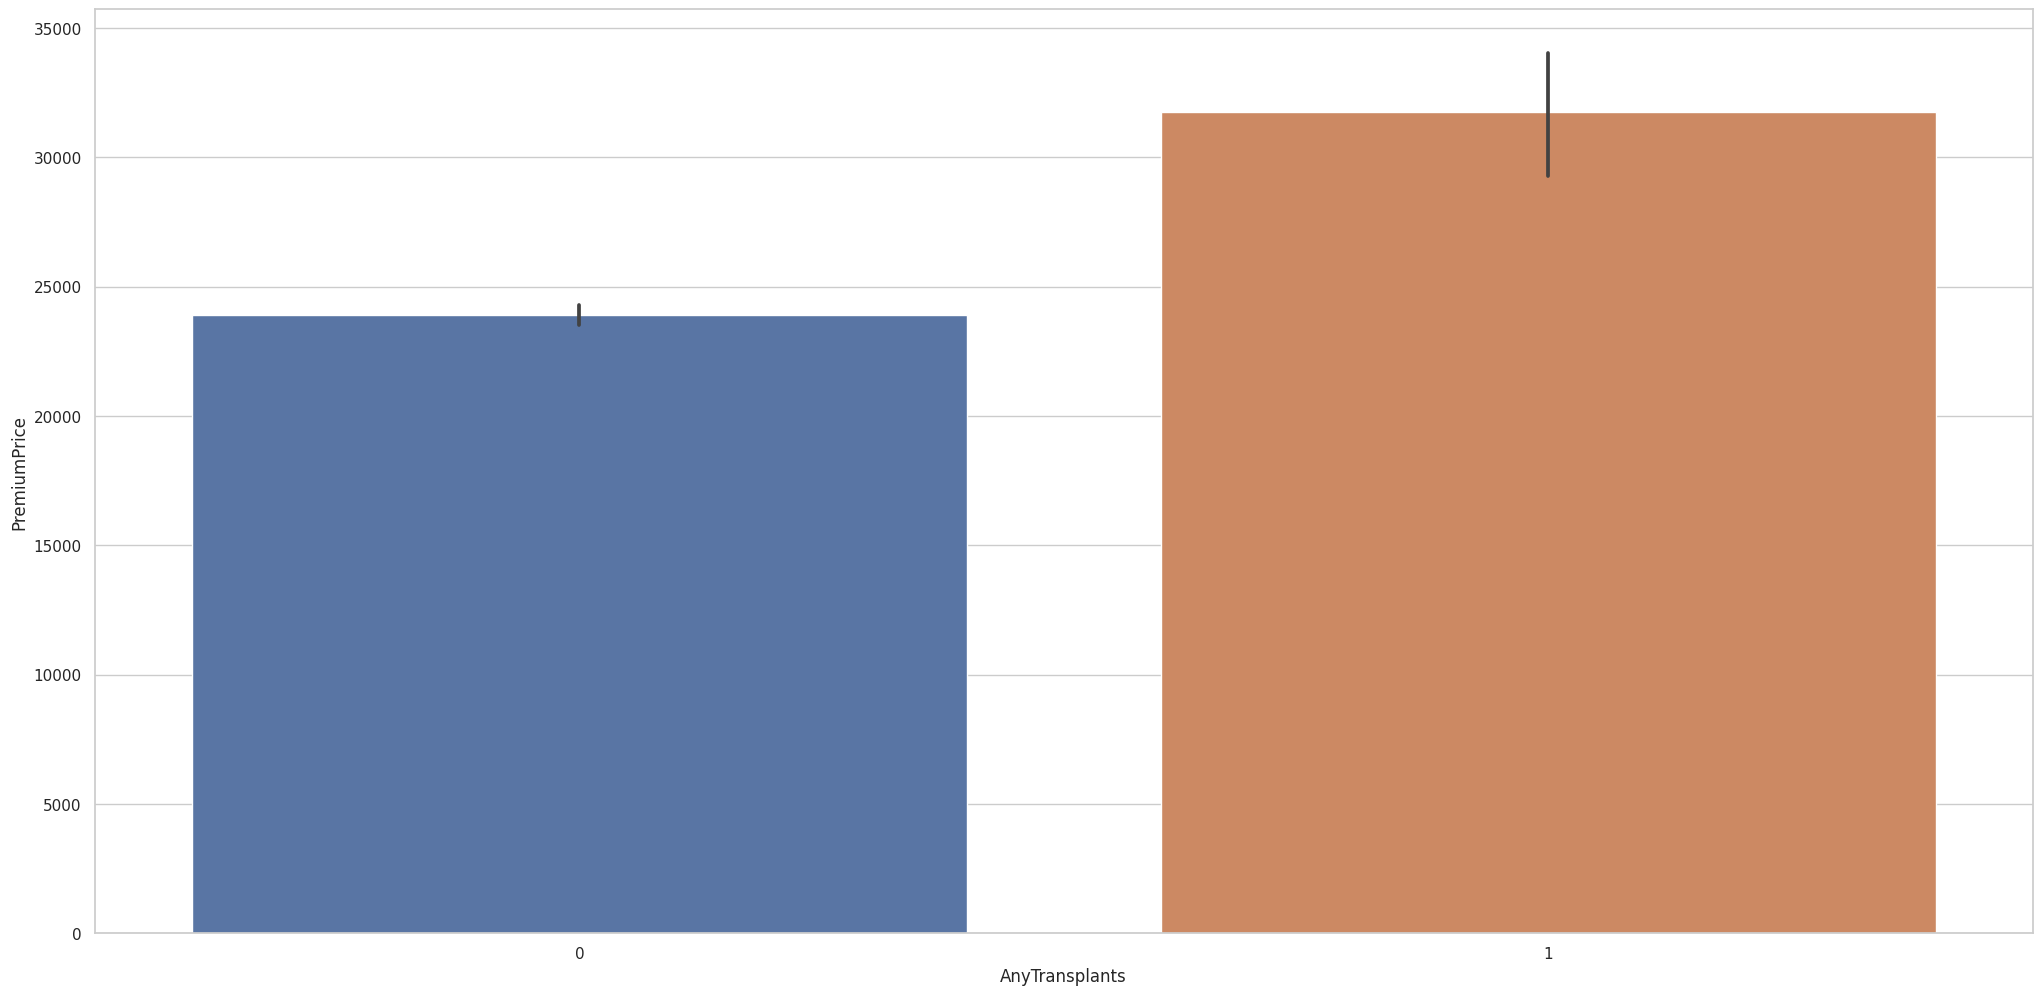

In [ ]:
sns.barplot(x="AnyTransplants", y="PremiumPrice", data=PPDF)
plt.show()

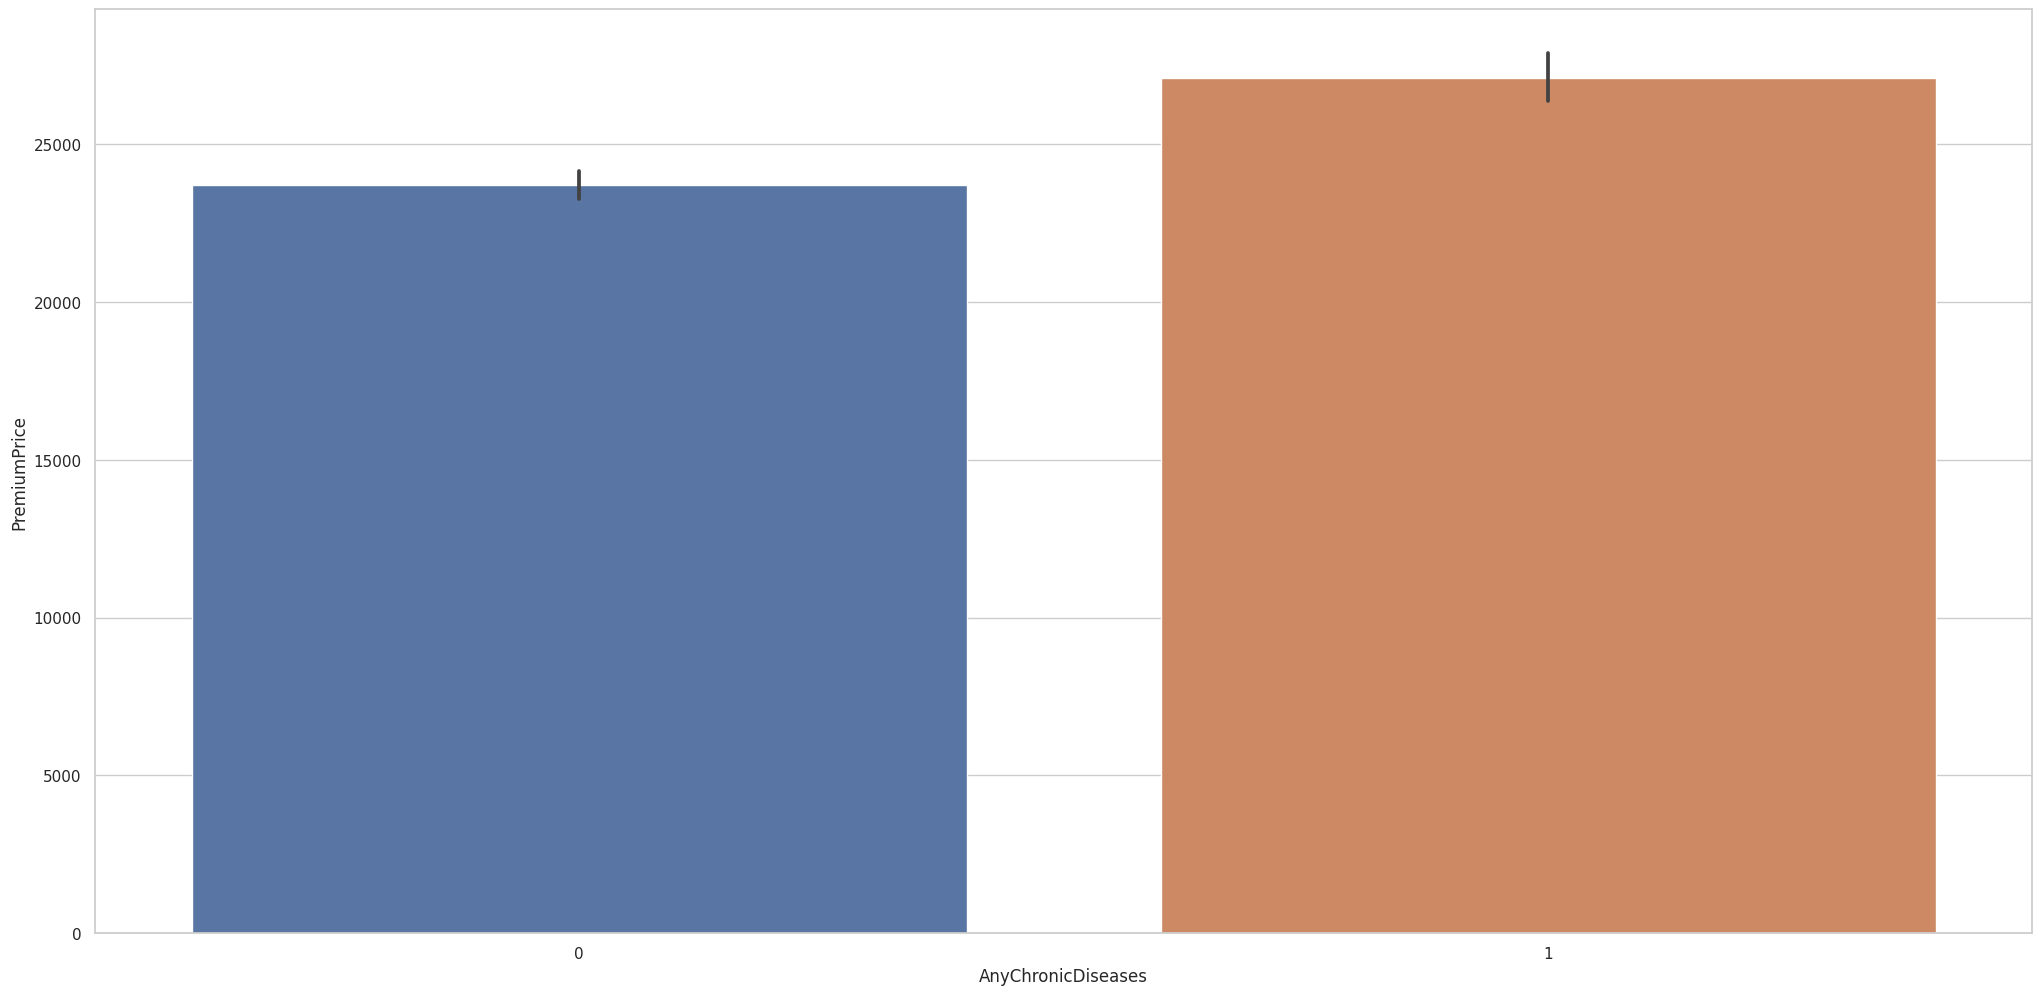

In [ ]:
sns.barplot(x="AnyChronicDiseases", y="PremiumPrice", data=PPDF)
plt.show()

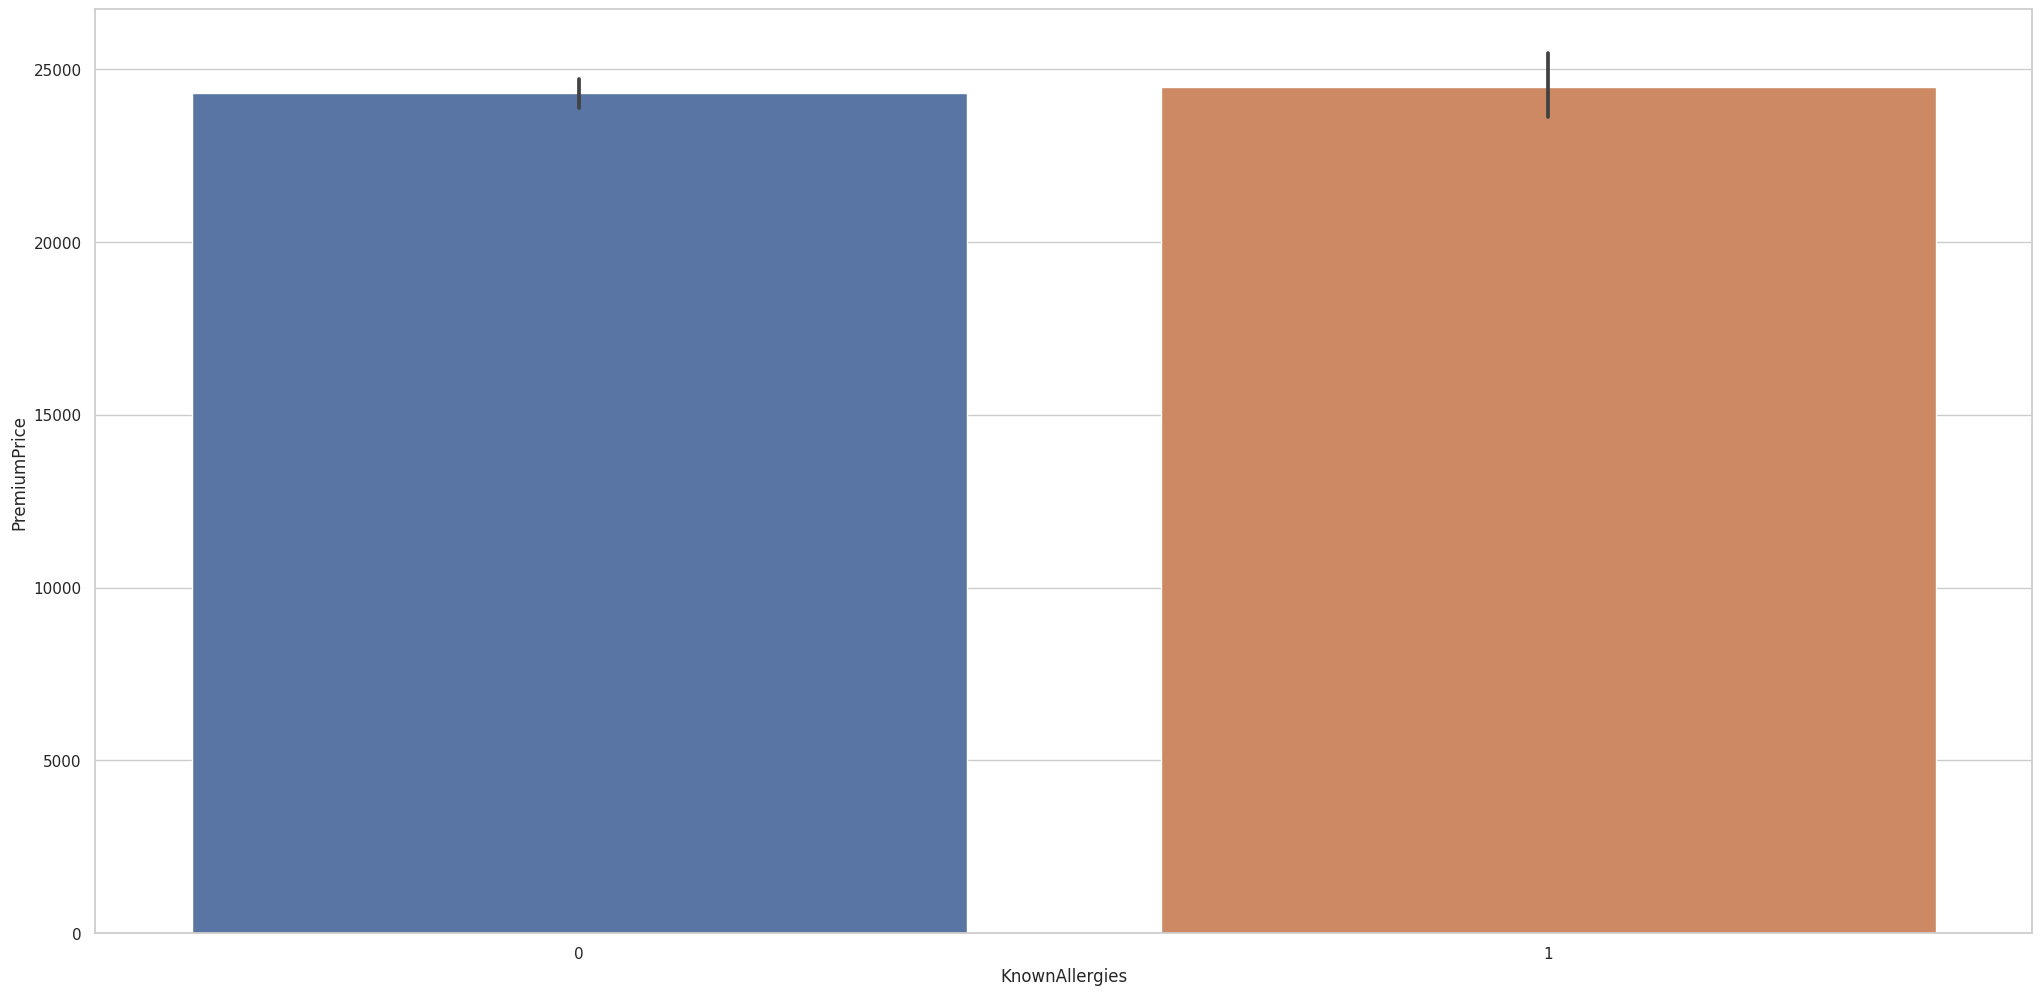

In [ ]:
sns.barplot(x="KnownAllergies", y="PremiumPrice", data=PPDF)
plt.show()

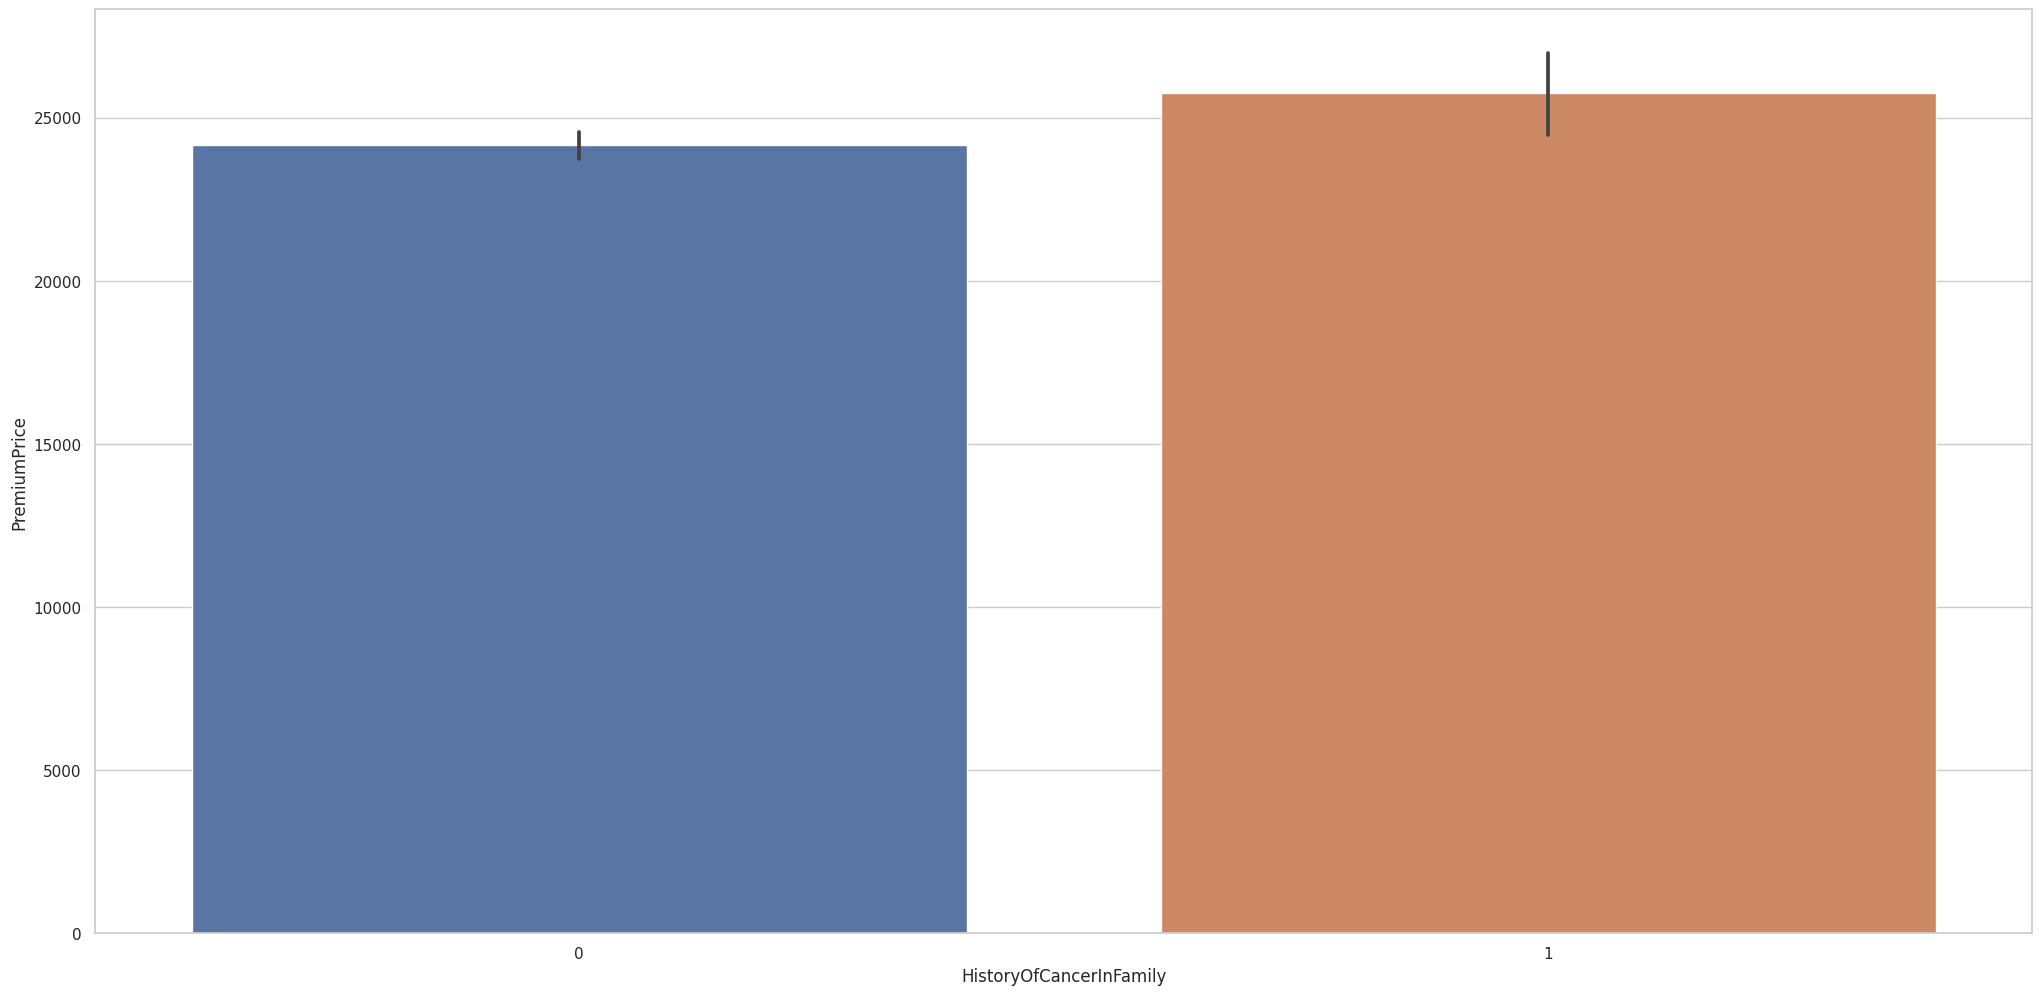

In [ ]:
sns.barplot(x="HistoryOfCancerInFamily", y="PremiumPrice", data=PPDF)
plt.show()

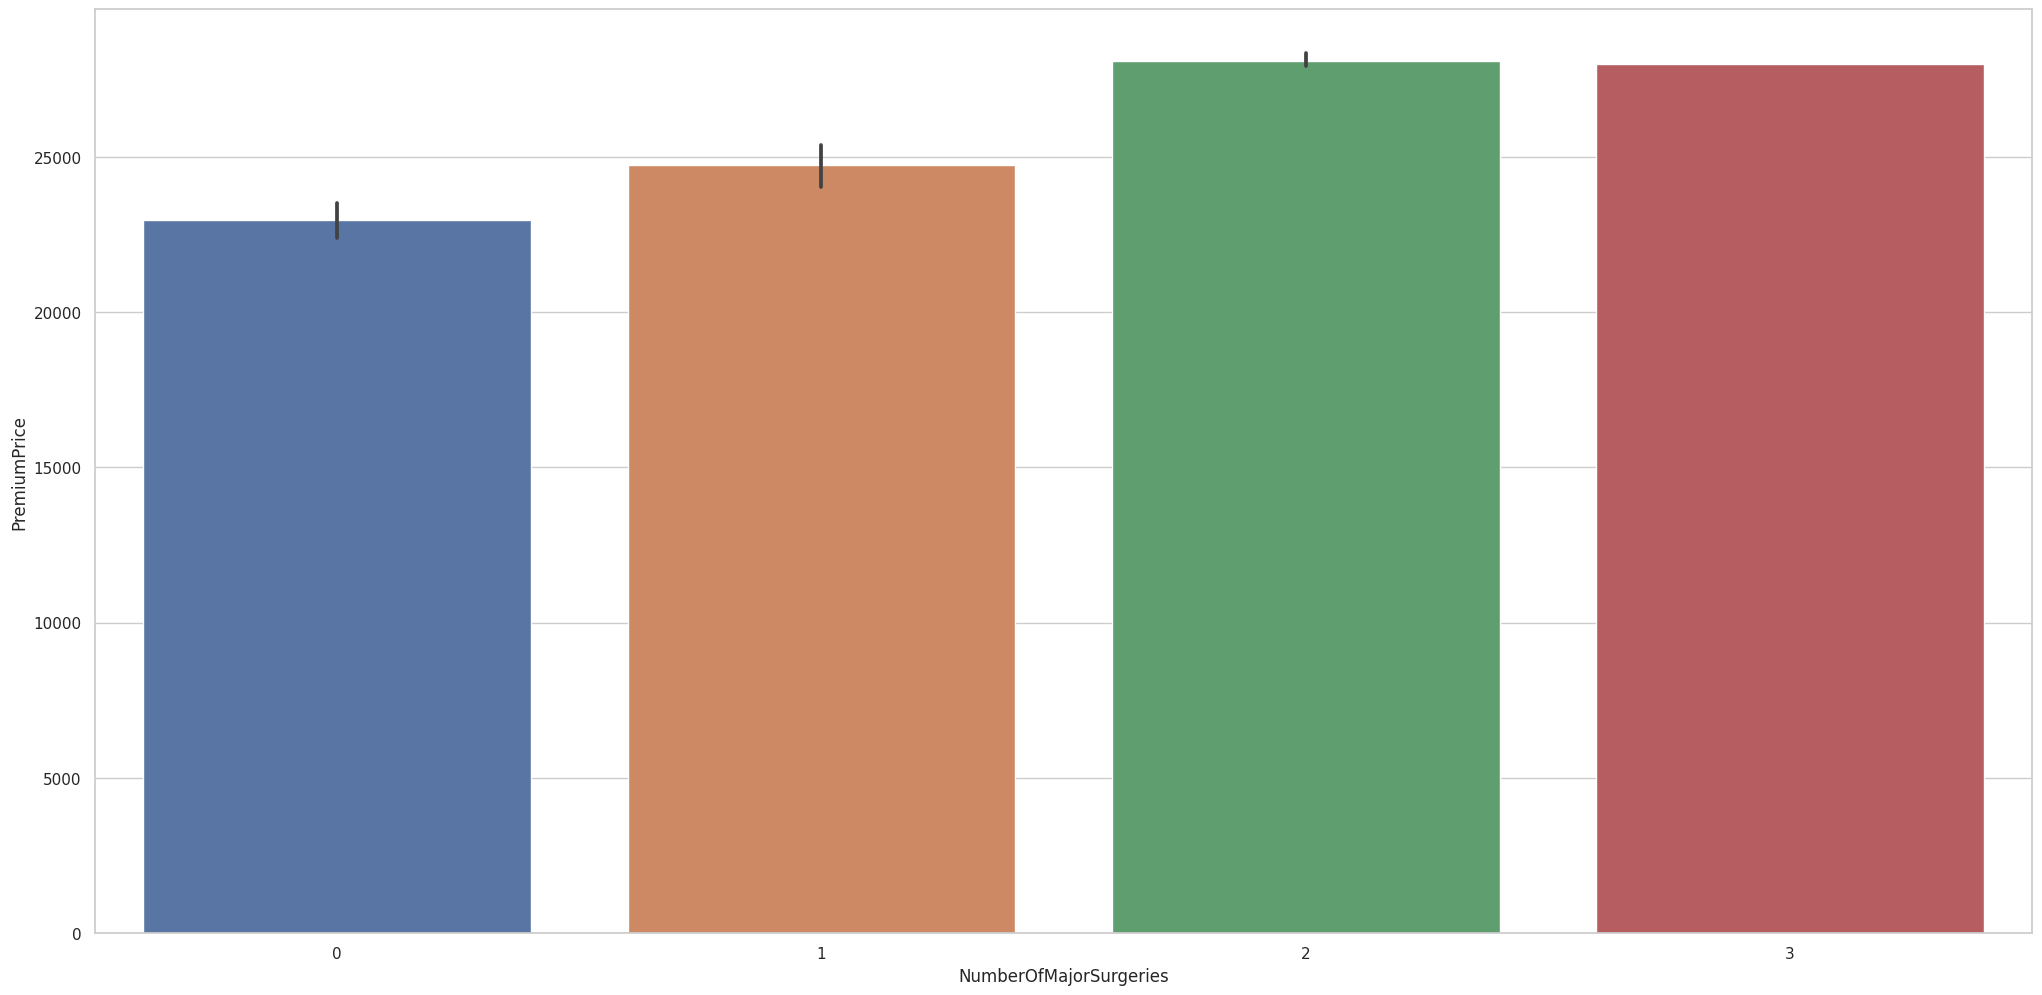

In [ ]:
sns.barplot(x="NumberOfMajorSurgeries", y="PremiumPrice", data=PPDF)
plt.show()

In [ ]:
PPDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


### **LOG TRANSFORMATION**

Creating a copy of original dataset

In [ ]:
PPDFC=PPDF.copy()

In [ ]:
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

In [ ]:
#performing logarithmic transformation on the feature
PPDFC['PremiumPrice_log']=np.log(PPDFC['PremiumPrice'])

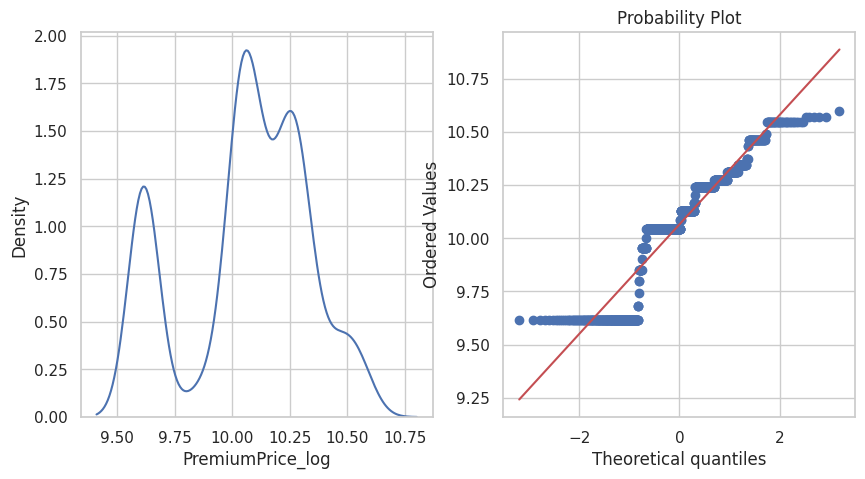

In [ ]:
#plotting to check the transformation
normality(PPDFC,'PremiumPrice_log')

### **Square Root Transformation** This transformation will take the square root of the Price column i.e sqrt(Price).

Creating a copy of original dataset

In [ ]:
PPDF2=PPDF.copy()

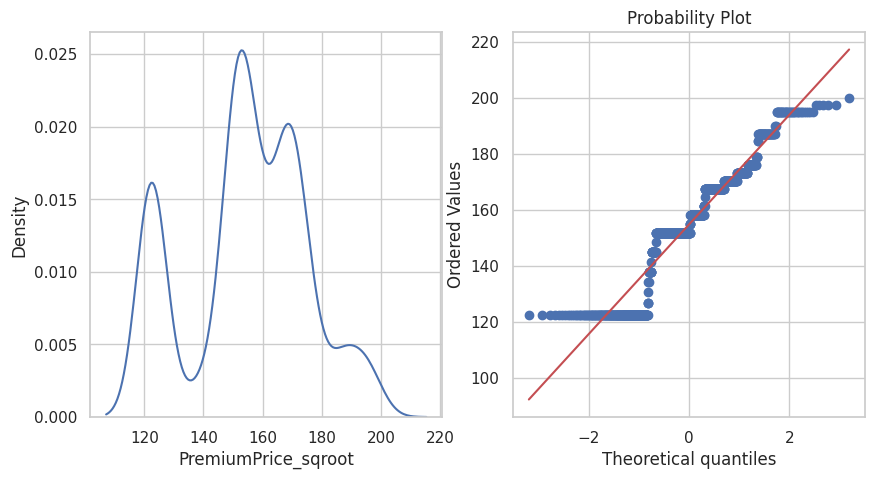

In [ ]:
PPDF2['PremiumPrice_sqroot']=np.sqrt(PPDF2.PremiumPrice)
normality(PPDF2,'PremiumPrice_sqroot')


### **Creating a copy of original dataset**

In [ ]:
PPDFR=PPDF.copy()

### **Reciprocal Transformation – This will inverse values of Price i.e1/Price**

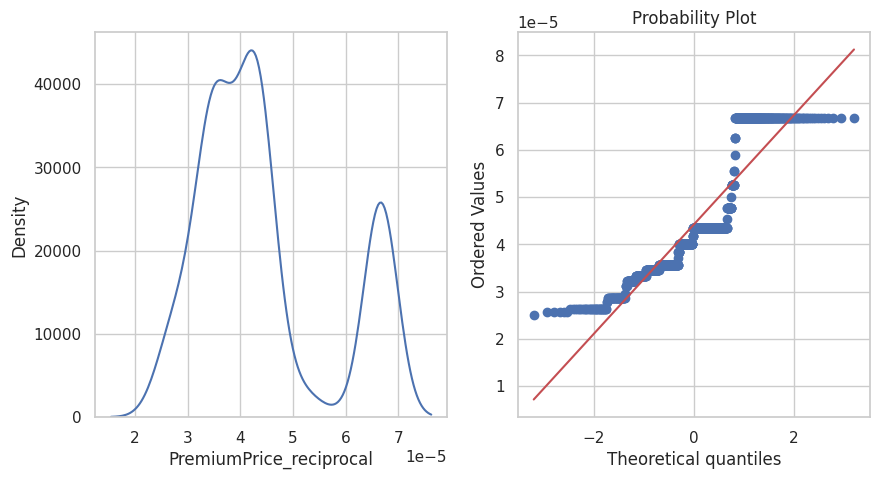

In [ ]:
PPDFR['PremiumPrice_reciprocal']=1/PPDFR.PremiumPrice
normality(PPDFR,'PremiumPrice_reciprocal')

### **Creating a copy of original dataset**

In [ ]:
PPDFE=PPDF.copy()

### **Exponential Transformation: The exponential value of the Price variable will be taken.**

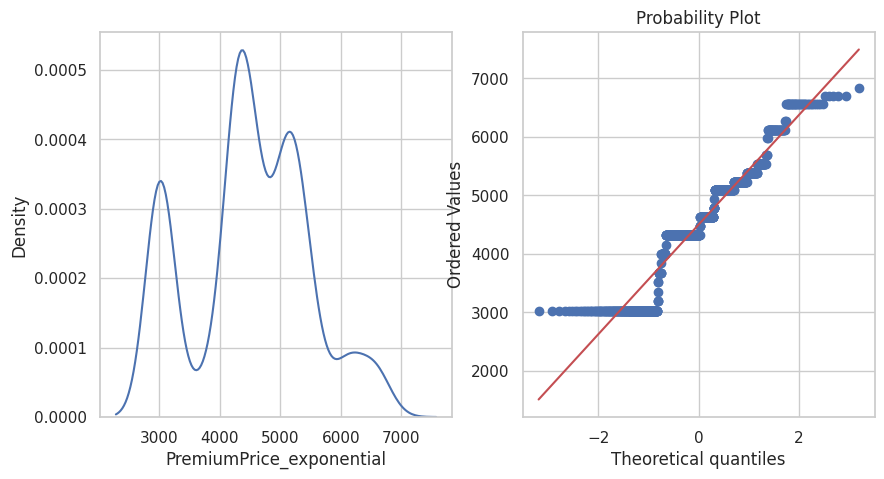

In [ ]:
PPDFE['PremiumPrice_exponential']=PPDFE.PremiumPrice**(1/1.2)
normality(PPDFE,'PremiumPrice_exponential')

### **Creating a copy of original dataset**

In [ ]:
PPDFB=PPDF.copy()

### **Box-Cox Transformation – The Box-Cox transformation is defined as:**


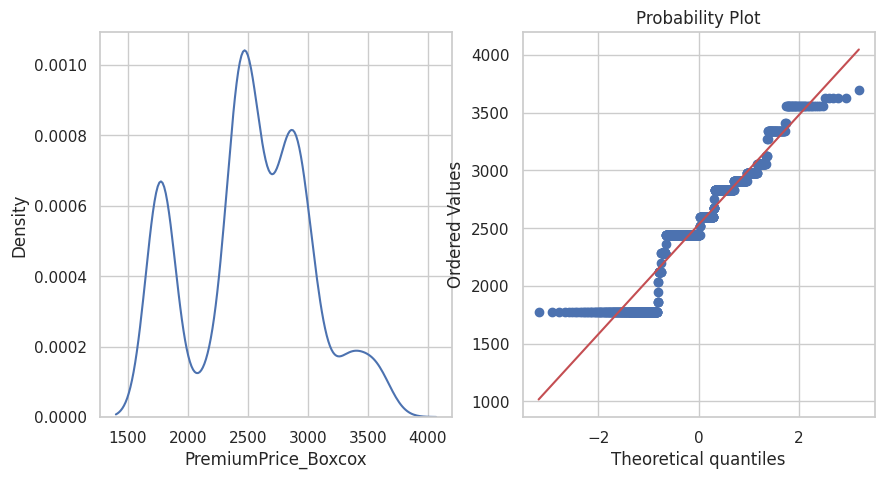

In [ ]:
PPDFB['PremiumPrice_Boxcox'],parameters=stats.boxcox(PPDFB['PremiumPrice'])
normality(PPDFB,'PremiumPrice_Boxcox')

From all the transformations discussed above, we can conclude that the Box cox and Exponential transformation are closer to normal distribution. Any one of the two can be used but as Box cox is more logic-based and involves the λ variable which is chosen as per the best skewness for the data so Box cox will be a better transformation to go with.

In [ ]:
  PPDFB.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumPrice_Boxcox
0,45,0,0,0,0,155,57,0,0,0,25000,2600.099768
1,60,1,0,0,0,180,73,0,0,0,29000,2905.486503
2,36,1,1,0,0,158,59,0,0,1,23000,2442.834806
3,52,1,1,0,1,183,93,0,0,2,28000,2830.194127
4,38,0,0,0,1,166,88,0,0,1,23000,2442.834806


### **BOXCOX TRANSFORMATION OF INDEPENDANT VARIABLES - AGE, HEIGHT AND WEIGHT**

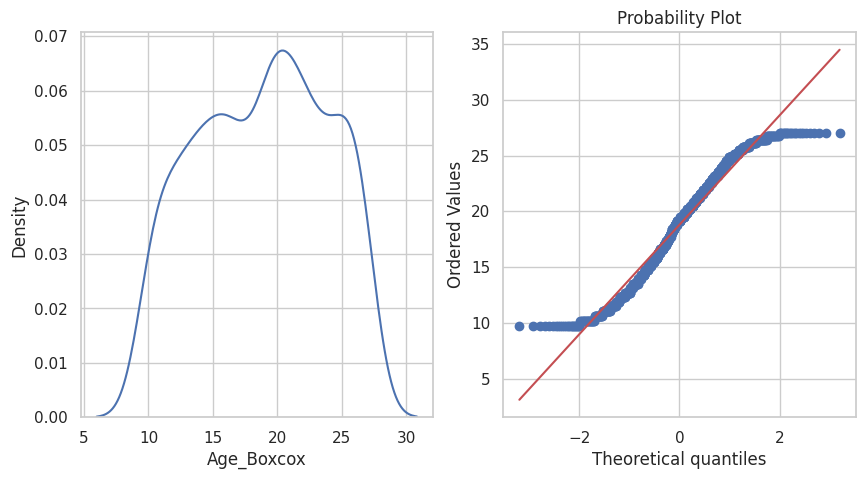

In [ ]:
PPDFB['Age_Boxcox'],parameters=stats.boxcox(PPDFB['Age'])
normality(PPDFB,'Age_Boxcox')

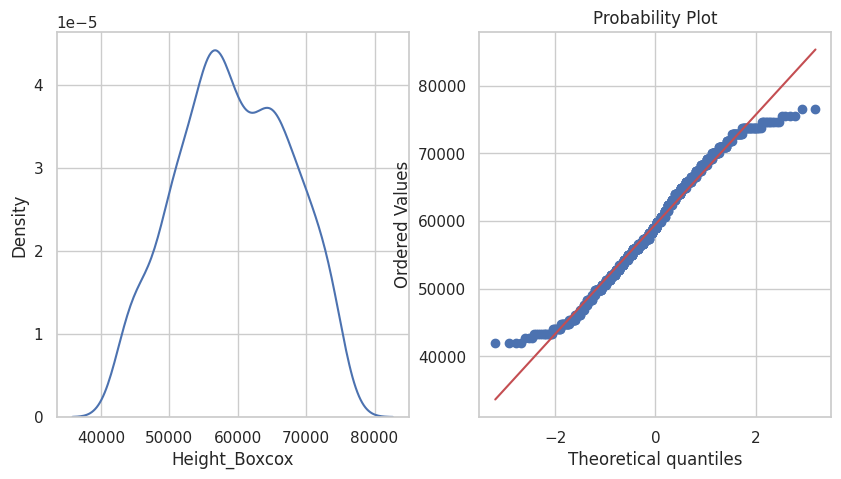

In [ ]:
PPDFB['Height_Boxcox'],parameters=stats.boxcox(PPDFB['Height'])
normality(PPDFB,'Height_Boxcox')

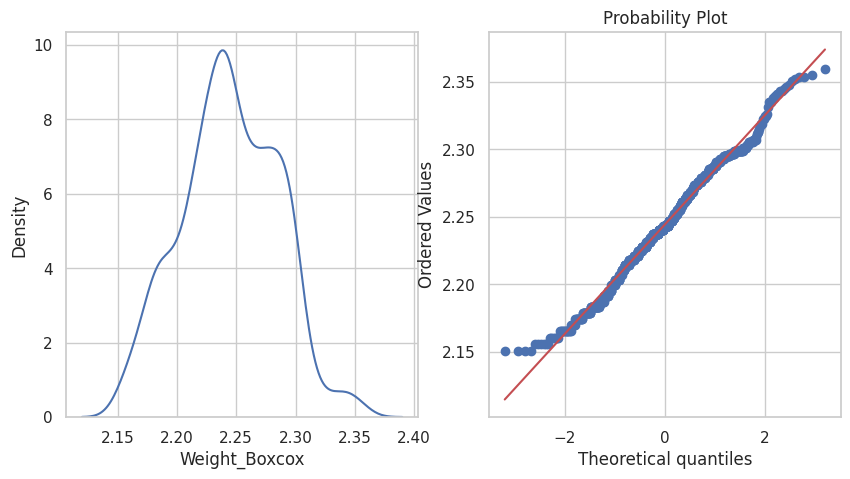

In [ ]:
PPDFB['Weight_Boxcox'],parameters=stats.boxcox(PPDFB['Weight'])
normality(PPDFB,'Weight_Boxcox')

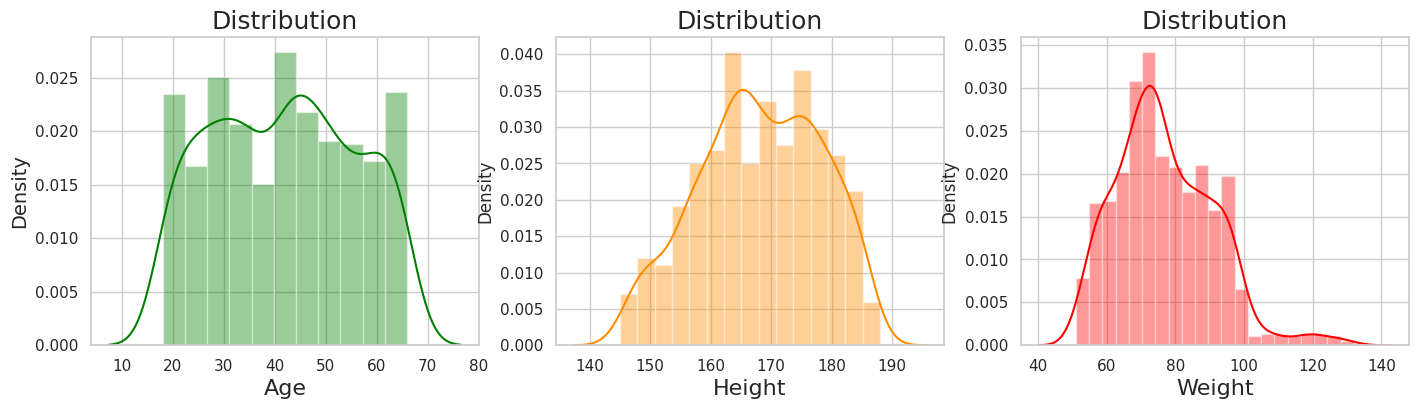

In [ ]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(PPDF['Age'], color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Age', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(PPDF['Height'], color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('Height', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(PPDF['Weight'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Weight', fontsize= 16)

plt.show()


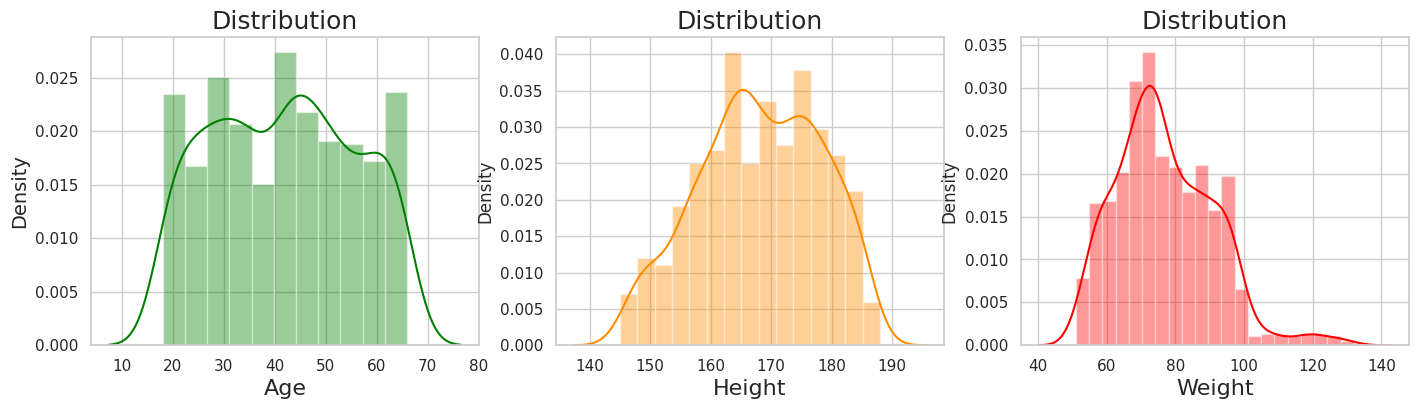

In [ ]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(PPDFB['Age'], color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Age', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(PPDFB['Height'], color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('Height', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(PPDFB['Weight'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Weight', fontsize= 16)

plt.show()


# **Correlation**

Now, we will see the correlation between all the features in our data set

<Axes: >

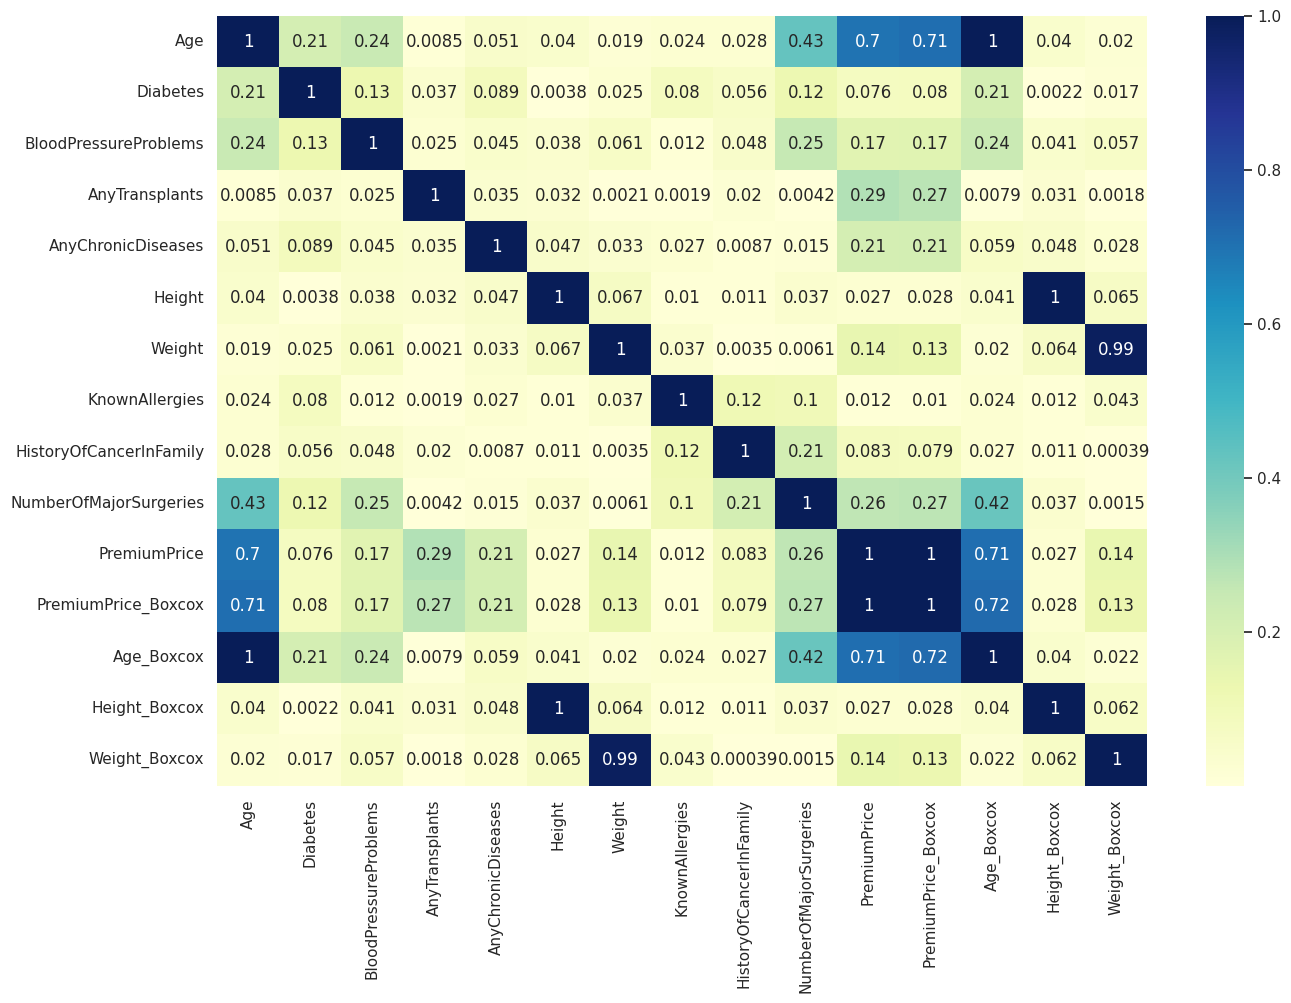

In [ ]:
# let's find all feature's correlation with Heatmap
# correlation
plt.figure(figsize=(15,10))
correlation = PPDFB.corr()
sns.heatmap(abs(correlation), annot = True, cmap='YlGnBu')

In [ ]:
FINDF=PPDFB.drop(['PremiumPrice','Age','Height','Weight'],axis=1)

array([[<Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'BloodPressureProblems'}>,
        <Axes: title={'center': 'AnyTransplants'}>],
       [<Axes: title={'center': 'AnyChronicDiseases'}>,
        <Axes: title={'center': 'KnownAllergies'}>,
        <Axes: title={'center': 'HistoryOfCancerInFamily'}>],
       [<Axes: title={'center': 'NumberOfMajorSurgeries'}>,
        <Axes: title={'center': 'PremiumPrice_Boxcox'}>,
        <Axes: title={'center': 'Age_Boxcox'}>],
       [<Axes: title={'center': 'Height_Boxcox'}>,
        <Axes: title={'center': 'Weight_Boxcox'}>, <Axes: >]],
      dtype=object)

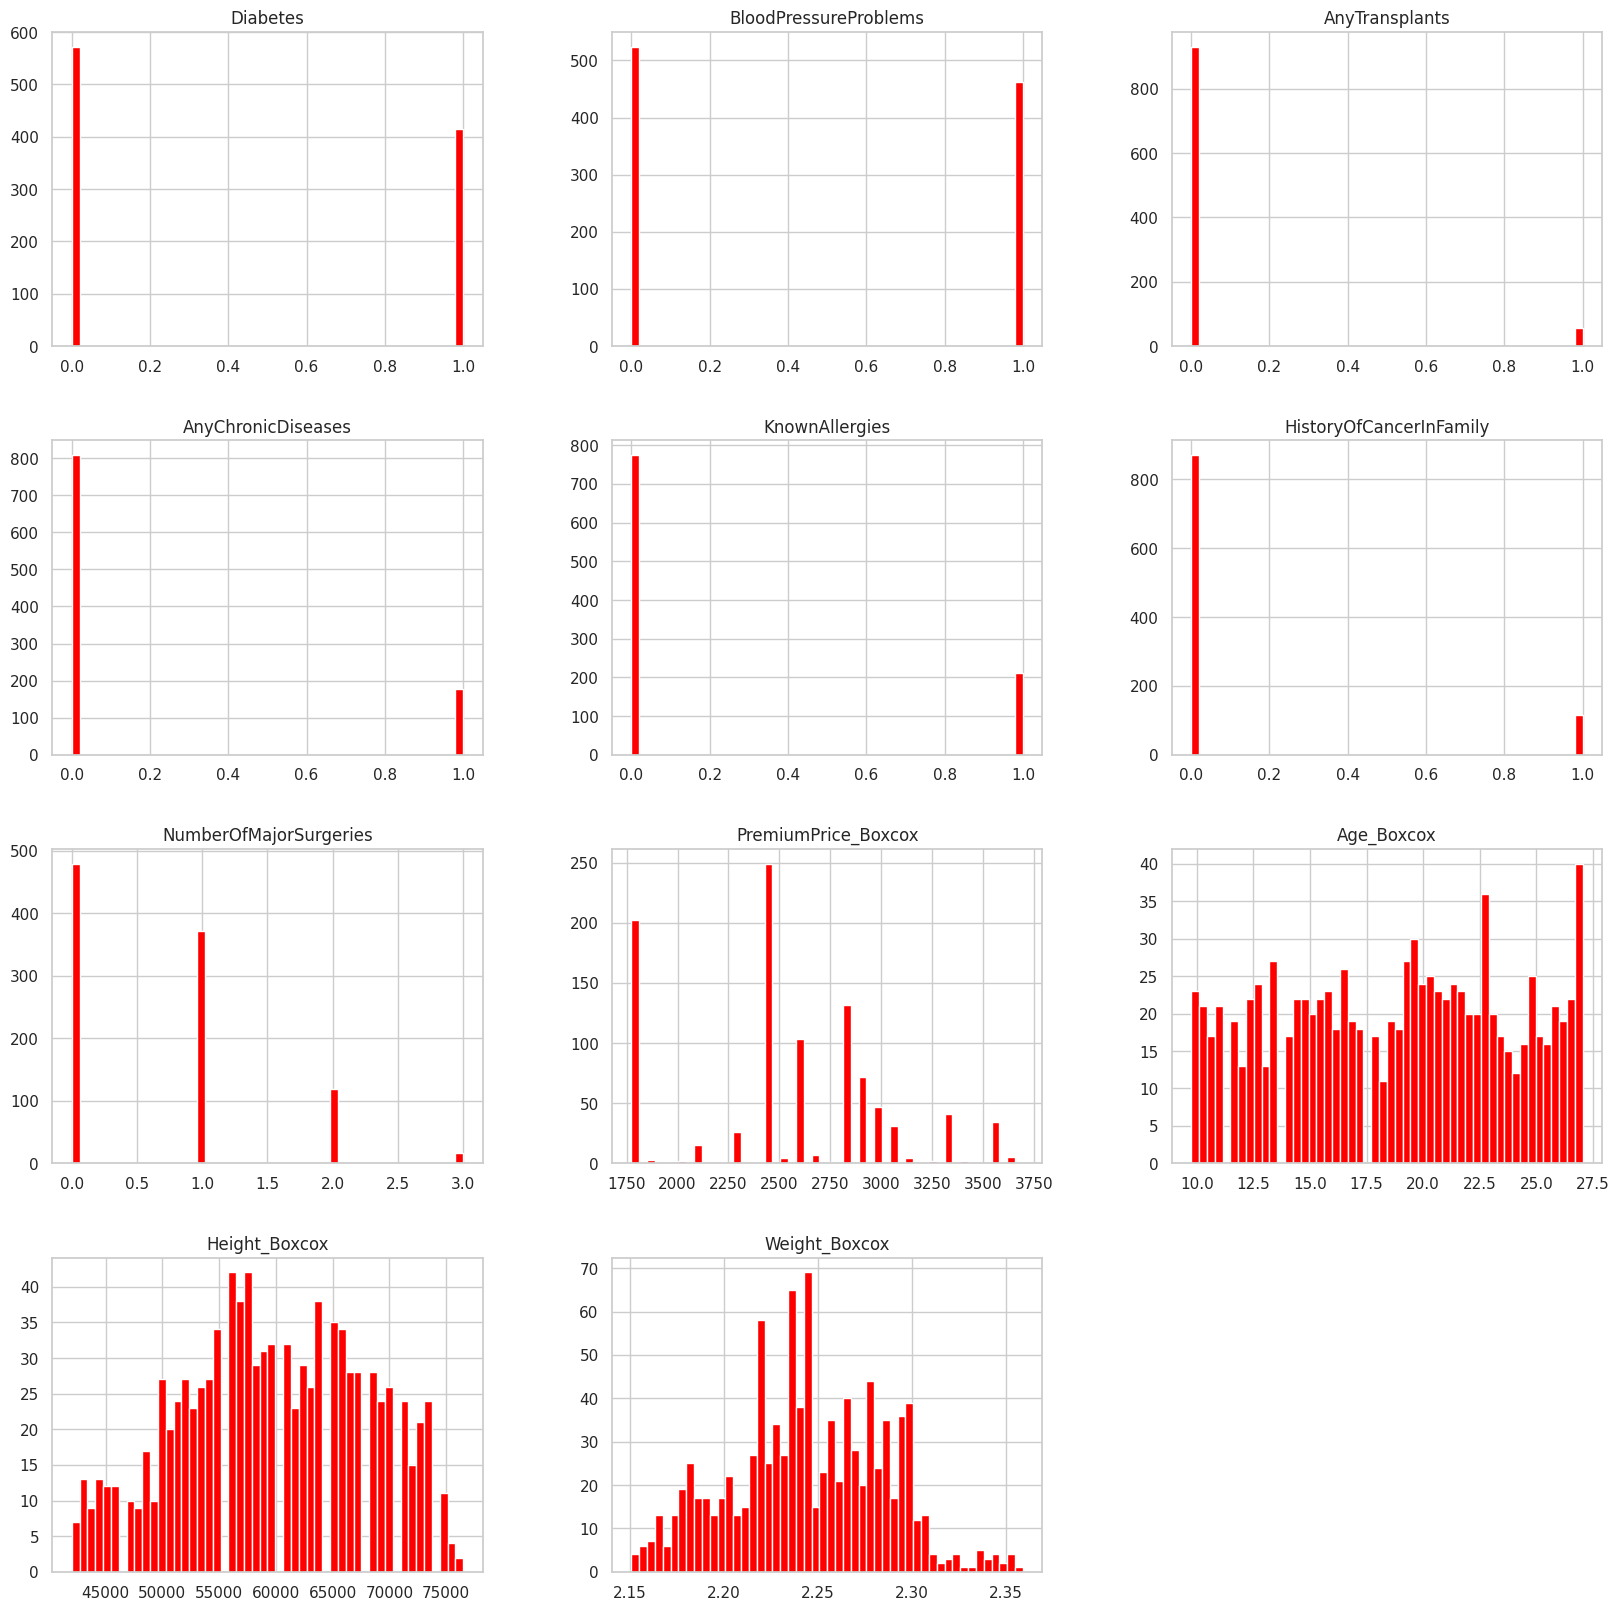

In [ ]:
FINDF.hist(figsize = (20,20),bins=50,color='red')

<Axes: >

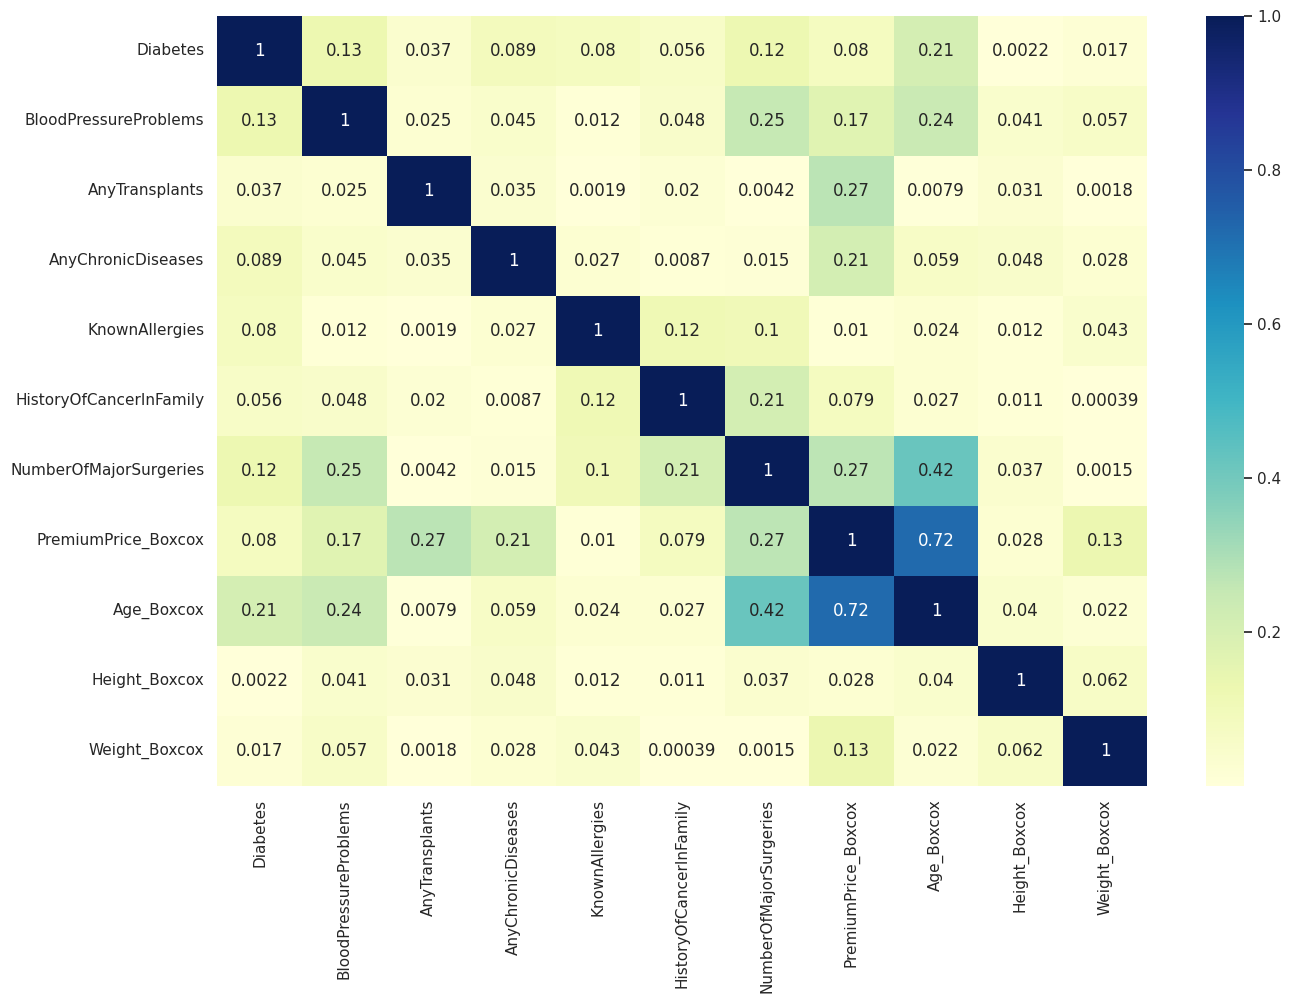

In [ ]:
plt.figure(figsize=(15,10))
correlation = FINDF.corr()
sns.heatmap(abs(correlation), annot = True, cmap='YlGnBu')

# **Model Development**

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.



### **We will build these regression models for our data.**
Linear Regression

Ridge Rigression

Lasso Rigression

Elastic Net Regression

Decision tree regressor

Support vector Regressor

Random forest regressor

GradientBoostingRegressor

AdaBoostRegressor

KNeighborsRegressor

CatBoost

XG Boost Regrression

By using Cross-Validation, we will able to get more metrics and draw important conclusion both about our algorithm and our data.

## **Implementing Linear Regression**

Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. Linear regression can be applied to various areas in business and academic study.

You’ll find that linear regression is used in everything from biological, behavioral, environmental and social sciences to business. Linear-regression models have become a proven way to scientifically and reliably predict the future. Because linear regression is a long-established statistical procedure, the properties of linear-regression models are well understood and can be trained very quickly. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

In [ ]:
# Splitting our data into Dependent and Independent Variables


X = FINDF.drop(columns=['PremiumPrice_Boxcox'])
y = FINDF['PremiumPrice_Boxcox']




# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)


# Fitting regression model
lrn= LinearRegression()
lrn.fit(X_train, y_train)


# make predictions using the model
y_pred_train_lrn = lrn.predict(X_train)
y_pred_test_lrn = lrn.predict(X_test)


# calculate the evaluation metrics for the training data
mse_train = mean_squared_error(y_train, y_pred_train_lrn)
mae_train = mean_absolute_error(y_train, y_pred_train_lrn)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_lrn)


# calculate the evaluation metrics for the test data
mse_test = mean_squared_error(y_test, y_pred_test_lrn)
mae_test = mean_absolute_error(y_test, y_pred_test_lrn)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_lrn)


# print the evaluation metrics
print("Train MSE: ", mse_train)
print("Train MAE: ", mae_train)
print("Train RMSE: ", rmse_train)
print("Train R2: ", r2_train)
print("---------- ")




print("Test MSE: ", mse_test)
print("Test MAE: ", mae_test)
print("Test RMSE: ", rmse_test)
print("Test R2: ", r2_test)




Shape of the X_train dataset : (690, 10)
Shape of the X_test dataset : (296, 10)
Shape of the y_train dataset : (690,)
Shape of the y_test dataset : (296,)
Train MSE:  80772.37682164839
Train MAE:  205.94573050624535
Train RMSE:  284.2048149163705
Train R2:  0.6618638373001919
---------- 
Test MSE:  85955.94133511386
Test MAE:  207.840310635861
Test RMSE:  293.18243694858984
Test R2:  0.6536147225919402


Ridge and Lasso Regression

Ridge and Lasso Regression are types of Regularization techniques

Regularization techniques are used to deal with overfitting and when the dataset is large

Ridge and Lasso Regression involve adding penalties to the regression function

## **Implementing Ridge Regression**

Ridge Regression: As mentioned before, ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

Objective = RSS + α * (sum of square of coefficients)

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

α = 0:
The objective becomes same as simple linear regression.
We’ll get the same coefficients as simple linear regression.
α = ∞:
The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
0 < α < ∞: The magnitude of α will decide the weightage given to different parts of objective. The coefficients will be somewhere between 0 and ones for simple linear regression.
I hope this gives some sense on how α would impact the magnitude of coefficients. One thing is for sure that any non-zero value would give values less than that of simple linear regression. By how much? We’ll find out soon. Leaving the mathematical details for later, lets see ridge regression in action on the same problem as above.



In [ ]:
# Splitting our data into Dependent and Independent Variables


X = FINDF.drop(columns=['PremiumPrice_Boxcox'])
y = FINDF['PremiumPrice_Boxcox']




# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)

from sklearn.linear_model import Ridge

# Fitting regression model
rid = Ridge()
rid.fit(X_train, y_train)


# make predictions using the model
y_pred_train_rid = rid.predict(X_train)
y_pred_test_rid = rid.predict(X_test)


# calculate the evaluation metrics for the training data
mse_train = mean_squared_error(y_train, y_pred_train_rid)
mae_train = mean_absolute_error(y_train, y_pred_train_rid)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_rid)


# calculate the evaluation metrics for the test data
mse_test = mean_squared_error(y_test, y_pred_test_rid)
mae_test = mean_absolute_error(y_test, y_pred_test_rid)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_rid)


# print the evaluation metrics
print("Train MSE: ", mse_train)
print("Train MAE: ", mae_train)
print("Train RMSE: ", rmse_train)
print("Train R2: ", r2_train)
print("---------- ")




print("Test MSE: ", mse_test)
print("Test MAE: ", mae_test)
print("Test RMSE: ", rmse_test)
print("Test R2: ", r2_test)




Shape of the X_train dataset : (690, 10)
Shape of the X_test dataset : (296, 10)
Shape of the y_train dataset : (690,)
Shape of the y_test dataset : (296,)
Train MSE:  82093.8553648803
Train MAE:  206.05783162332145
Train RMSE:  286.52025297503894
Train R2:  0.6563317519353495
---------- 
Test MSE:  86941.23106298022
Test MAE:  206.76769140914647
Test RMSE:  294.85798456711365
Test R2:  0.649644201759835


## **Implementing Cross Validation Of Ridge**


Cross-Validation is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.

*   To overcome over-fitting problems, we use a technique called Cross-Validation.

*   Let’s dive deep and learn about some of the model evaluation techniques.

Importing GridSearch
from sklearn.model_selection import GridSearchCV


Hyperparameter of tunning
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)


ridge_regressor.fit(X_train, y_train)


print(" The Best Fit Alpha Value is found out to be :", ridge_regressor.best_params_['alpha'])
print(" The negative MSE(mean squared error) score is :", round(ridge_regressor.best_score_, 3))


 Model Prediction
y_pred_ridge1 = ridge_regressor.predict(X_test)
y_pred_ridge1


np.array(y_test)


# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred_ridge1), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge1)), 4))
print("MAE score:", round(mean_absolute_error(y_test, y_pred_ridge1), 2))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred_ridge1), 4))
print("R2 score:", round(r2_score(y_test, y_pred_ridge1), 4))


plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test), (y_pred_ridge1),color='darkorange')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

## **Ridge Predication vs Actual (After Cross-Validation)**

# actual Price Vs Predicted Price for ridge regression
predicted = 10**(y_pred_ridge1)
Actual = 10**(np.array(y_test))
plt.figure(figsize=(10,6))
plt.plot(predicted,color='darkorange')
plt.plot(Actual)
plt.suptitle('Actual Vs Predicted Value : Cross-Validation Of Ridge ', fontsize = 14)
plt.legend(['Predicted','Actual'], fontsize = 14)
plt.xlabel('No Of Test Data', fontsize= 12)
plt.ylabel('Premium Price', fontsize= 12)
plt.grid(True)

## **Implementing Lasso Regression**


LASSO stands for Least Absolute Shrinkage and Selection Operator. I know it doesn’t give much of an idea but there are 2 key words here – ‘absolute‘ and ‘selection‘.

Lets consider the former first and worry about the latter later.

Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients) Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:

1. α = 0: Same coefficients as simple linear regression
2. α = ∞: All coefficients zero (same logic as before)
3. 0 < α < ∞: coefficients between 0 and that of simple linear regression
Yes its appearing to be very similar to Ridge till now. But just hang on with me and you’ll know the difference by the time we finish.

In [ ]:
# Splitting our data into Dependent and Independent Variables


X = FINDF.drop(columns=['PremiumPrice_Boxcox'])
y = FINDF['PremiumPrice_Boxcox']




# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)

from sklearn.linear_model import Lasso


# Fitting regression model
las = Lasso()
las.fit(X_train, y_train)


# make predictions using the model
y_pred_train_las = las.predict(X_train)
y_pred_test_las = las.predict(X_test)


# calculate the evaluation metrics for the training data
mse_train = mean_squared_error(y_train, y_pred_train_las)
mae_train = mean_absolute_error(y_train, y_pred_train_las)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_las)


# calculate the evaluation metrics for the test data
mse_test = mean_squared_error(y_test, y_pred_test_las)
mae_test = mean_absolute_error(y_test, y_pred_test_las)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_las)


# print the evaluation metrics
print("Train MSE: ", mse_train)
print("Train MAE: ", mae_train)
print("Train RMSE: ", rmse_train)
print("Train R2: ", r2_train)
print("---------- ")




print("Test MSE: ", mse_test)
print("Test MAE: ", mae_test)
print("Test RMSE: ", rmse_test)
print("Test R2: ", r2_test)




Shape of the X_train dataset : (690, 10)
Shape of the X_test dataset : (296, 10)
Shape of the y_train dataset : (690,)
Shape of the y_test dataset : (296,)
Train MSE:  81471.04289328086
Train MAE:  205.66072825869946
Train RMSE:  285.4313278063234
Train R2:  0.6589390222363489
---------- 
Test MSE:  86231.11192510776
Test MAE:  206.81971579773642
Test RMSE:  293.65134415682104
Test R2:  0.6525058400682997


## **Implementing Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Splitting our data into Dependent and Independent Variables


X = FINDF.drop(columns=['PremiumPrice_Boxcox'])
y = FINDF['PremiumPrice_Boxcox']




# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)


# Fitting regression model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)


# make predictions using the model
y_pred_train_dtr = dtr.predict(X_train)
y_pred_test_dtr = dtr.predict(X_test)


# calculate the evaluation metrics for the training data
mse_train = mean_squared_error(y_train, y_pred_train_dtr)
mae_train = mean_absolute_error(y_train, y_pred_train_dtr)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_dtr)


# calculate the evaluation metrics for the test data
mse_test = mean_squared_error(y_test, y_pred_test_dtr)
mae_test = mean_absolute_error(y_test, y_pred_test_dtr)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_dtr)


# print the evaluation metrics
print("Train MSE: ", mse_train)
print("Train MAE: ", mae_train)
print("Train RMSE: ", rmse_train)
print("Train R2: ", r2_train)
print("---------- ")




print("Test MSE: ", mse_test)
print("Test MAE: ", mae_test)
print("Test RMSE: ", rmse_test)
print("Test R2: ", r2_test)




Shape of the X_train dataset : (690, 10)
Shape of the X_test dataset : (296, 10)
Shape of the y_train dataset : (690,)
Shape of the y_test dataset : (296,)
Train MSE:  3.003474821992814e-24
Train MAE:  1.1045747247619042e-12
Train RMSE:  1.7330536119788143e-12
Train R2:  1.0
---------- 
Test MSE:  118476.90250507808
Test MAE:  99.2215674667365
Test RMSE:  344.2047392251857
Test R2:  0.5225617438046204


**SUPPORT VECTOR REGRESSOR**

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Splitting our data into Dependent and Independent Variables


X = FINDF.drop(columns=['PremiumPrice_Boxcox'])
y = FINDF['PremiumPrice_Boxcox']




# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)


# Fitting regression model
svr = SVR()
svr.fit(X_train, y_train)


# make predictions using the model
y_pred_train_svr = svr.predict(X_train)
y_pred_test_svr = svr.predict(X_test)


# calculate the evaluation metrics for the training data
mse_train = mean_squared_error(y_train, y_pred_train_svr)
mae_train = mean_absolute_error(y_train, y_pred_train_svr)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_svr)


# calculate the evaluation metrics for the test data
mse_test = mean_squared_error(y_test, y_pred_test_svr)
mae_test = mean_absolute_error(y_test, y_pred_test_svr)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_svr)


# print the evaluation metrics
print("Train MSE: ", mse_train)
print("Train MAE: ", mae_train)
print("Train RMSE: ", rmse_train)
print("Train R2: ", r2_train)
print("---------- ")




print("Test MSE: ", mse_test)
print("Test MAE: ", mae_test)
print("Test RMSE: ", rmse_test)
print("Test R2: ", r2_test)


Shape of the X_train dataset : (690, 10)
Shape of the X_test dataset : (296, 10)
Shape of the y_train dataset : (690,)
Shape of the y_test dataset : (296,)
Train MSE:  243848.5748686586
Train MAE:  384.422338743776
Train RMSE:  493.81026201230225
Train R2:  -0.020819550326838687
---------- 
Test MSE:  265671.47308129777
Test MAE:  397.7782426684562
Test RMSE:  515.4332867416479
Test R2:  -0.0706029795415688


## **Random forest regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Splitting our data into Dependent and Independent Variables


X = FINDF.drop(columns=['PremiumPrice_Boxcox'])
y = FINDF['PremiumPrice_Boxcox']




# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)


# Fitting regression model
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)


# make predictions using the model
y_pred_train_rfr = rfr.predict(X_train)
y_pred_test_rfr = rfr.predict(X_test)


# calculate the evaluation metrics for the training data
mse_train = mean_squared_error(y_train, y_pred_train_rfr)
mae_train = mean_absolute_error(y_train, y_pred_train_rfr)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_rfr)


# calculate the evaluation metrics for the test data
mse_test = mean_squared_error(y_test, y_pred_test_rfr)
mae_test = mean_absolute_error(y_test, y_pred_test_rfr)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_rfr)


# print the evaluation metrics
print("Train MSE: ", mse_train)
print("Train MAE: ", mae_train)
print("Train RMSE: ", rmse_train)
print("Train R2: ", r2_train)
print("---------- ")




print("Test MSE: ", mse_test)
print("Test MAE: ", mae_test)
print("Test RMSE: ", rmse_test)
print("Test R2: ", r2_test)


Shape of the X_train dataset : (690, 10)
Shape of the X_test dataset : (296, 10)
Shape of the y_train dataset : (690,)
Shape of the y_test dataset : (296,)
Train MSE:  6447.78467500554
Train MAE:  31.19582477626339
Train RMSE:  80.29809882559823
Train R2:  0.9730077378713874
---------- 
Test MSE:  81696.3709854938
Test MAE:  109.79863082340876
Test RMSE:  285.8257703313223
Test R2:  0.6707799404265049


## **GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Splitting our data into Dependent and Independent Variables


X = FINDF.drop(columns=['PremiumPrice_Boxcox'])
y = FINDF['PremiumPrice_Boxcox']




# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)


# Fitting regression model
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)


# make predictions using the model
y_pred_train_gbr = gbr.predict(X_train)
y_pred_test_gbr = gbr.predict(X_test)


# calculate the evaluation metrics for the training data
mse_train = mean_squared_error(y_train, y_pred_train_gbr)
mae_train = mean_absolute_error(y_train, y_pred_train_gbr)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_gbr)


# calculate the evaluation metrics for the test data
mse_test = mean_squared_error(y_test, y_pred_test_gbr)
mae_test = mean_absolute_error(y_test, y_pred_test_gbr)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_gbr)


# print the evaluation metrics
print("Train MSE: ", mse_train)
print("Train MAE: ", mae_train)
print("Train RMSE: ", rmse_train)
print("Train R2: ", r2_train)
print("---------- ")




print("Test MSE: ", mse_test)
print("Test MAE: ", mae_test)
print("Test RMSE: ", rmse_test)
print("Test R2: ", r2_test)


Shape of the X_train dataset : (690, 10)
Shape of the X_test dataset : (296, 10)
Shape of the y_train dataset : (690,)
Shape of the y_test dataset : (296,)
Train MSE:  18017.17820618777
Train MAE:  79.28550631281382
Train RMSE:  134.22808277773981
Train R2:  0.9245749631118183
---------- 
Test MSE:  84349.29329907184
Test MAE:  138.2510212268237
Test RMSE:  290.4294979837135
Test R2:  0.6600891933151664


## **AdaBoostRegressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# Splitting our data into Dependent and Independent Variables


X = FINDF.drop(columns=['PremiumPrice_Boxcox'])
y = FINDF['PremiumPrice_Boxcox']




# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)


# Fitting regression model
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)


# make predictions using the model
y_pred_train_abr = abr.predict(X_train)
y_pred_test_abr = abr.predict(X_test)


# calculate the evaluation metrics for the training data
mse_train = mean_squared_error(y_train, y_pred_train_abr)
mae_train = mean_absolute_error(y_train, y_pred_train_abr)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_abr)


# calculate the evaluation metrics for the test data
mse_test = mean_squared_error(y_test, y_pred_test_abr)
mae_test = mean_absolute_error(y_test, y_pred_test_abr)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_abr)


# print the evaluation metrics
print("Train MSE: ", mse_train)
print("Train MAE: ", mae_train)
print("Train RMSE: ", rmse_train)
print("Train R2: ", r2_train)
print("---------- ")




print("Test MSE: ", mse_test)
print("Test MAE: ", mae_test)
print("Test RMSE: ", rmse_test)
print("Test R2: ", r2_test)


Shape of the X_train dataset : (690, 10)
Shape of the X_test dataset : (296, 10)
Shape of the y_train dataset : (690,)
Shape of the y_test dataset : (296,)
Train MSE:  59575.65390003263
Train MAE:  199.24842096123038
Train RMSE:  244.0812444659209
Train R2:  0.7505993534823185
---------- 
Test MSE:  104589.22792500076
Test MAE:  235.2061268704629
Test RMSE:  323.40257872348633
Test R2:  0.5785262988691556


## **KNeighborsRegressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Splitting our data into Dependent and Independent Variables


X = FINDF.drop(columns=['PremiumPrice_Boxcox'])
y = FINDF['PremiumPrice_Boxcox']




# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)


# Fitting regression model
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)


# make predictions using the model
y_pred_train_knr = knr.predict(X_train)
y_pred_test_knr = knr.predict(X_test)


# calculate the evaluation metrics for the training data
mse_train = mean_squared_error(y_train, y_pred_train_knr)
mae_train = mean_absolute_error(y_train, y_pred_train_knr)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_knr)


# calculate the evaluation metrics for the test data
mse_test = mean_squared_error(y_test, y_pred_test_knr)
mae_test = mean_absolute_error(y_test, y_pred_test_knr)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_knr)


# print the evaluation metrics
print("Train MSE: ", mse_train)
print("Train MAE: ", mae_train)
print("Train RMSE: ", rmse_train)
print("Train R2: ", r2_train)
print("---------- ")




print("Test MSE: ", mse_test)
print("Test MAE: ", mae_test)
print("Test RMSE: ", rmse_test)
print("Test R2: ", r2_test)


Shape of the X_train dataset : (690, 10)
Shape of the X_test dataset : (296, 10)
Shape of the y_train dataset : (690,)
Shape of the y_test dataset : (296,)
Train MSE:  83550.48300874229
Train MAE:  204.34949602873183
Train RMSE:  289.0510041649091
Train R2:  0.6502338939626231
---------- 
Test MSE:  148411.82262868888
Test MAE:  269.20311231421704
Test RMSE:  385.24255038701125
Test R2:  0.4019299939785128


## **Implementing Elastic Net Regression**

Elastic Net is a regression method that performs variable selection and regularization both simultaneously. The term regularization is the main concept behind the elastic net. Regularization comes into picture when the model is overfitted. Now we need to understand what overfitting means, so overfitting is a problem that occurs when the model is performing good with the training dataset, but with the test, dataset model is giving errors; in this situation the regularization is a technique to reduce the errors by fitting a function appropriately in the training dataset. These functions can be called penalties.

In [ ]:
#fitting data into Elastic Net
from sklearn.linear_model import ElasticNet

In [ ]:
# Splitting our data into Dependent and Independent Variables


X = FINDF.drop(columns=['PremiumPrice_Boxcox'])
y = FINDF['PremiumPrice_Boxcox']




# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)


# Fitting regression model
elr = ElasticNet(alpha=0.1,l1_ratio=0.5)
elr.fit(X_train, y_train)


# make predictions using the model
y_pred_train_elr = elr.predict(X_train)
y_pred_test_elr = elr.predict(X_test)


# calculate the evaluation metrics for the training data
mse_train = mean_squared_error(y_train, y_pred_train_elr)
mae_train = mean_absolute_error(y_train, y_pred_train_elr)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_elr)


# calculate the evaluation metrics for the test data
mse_test = mean_squared_error(y_test, y_pred_test_elr)
mae_test = mean_absolute_error(y_test, y_pred_test_elr)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_elr)


# print the evaluation metrics
print("Train MSE: ", mse_train)
print("Train MAE: ", mae_train)
print("Train RMSE: ", rmse_train)
print("Train R2: ", r2_train)
print("---------- ")




print("Test MSE: ", mse_test)
print("Test MAE: ", mae_test)
print("Test RMSE: ", rmse_test)
print("Test R2: ", r2_test)


Shape of the X_train dataset : (690, 10)
Shape of the X_test dataset : (296, 10)
Shape of the y_train dataset : (690,)
Shape of the y_test dataset : (296,)
Train MSE:  90979.5593035084
Train MAE:  217.48264571172493
Train RMSE:  301.6281805526606
Train R2:  0.6191336657712068
---------- 
Test MSE:  100370.91601785099
Test MAE:  220.31097799294417
Test RMSE:  316.81369291407054
Test R2:  0.595525253420246


## **Implementing XG Boost Regression**


XGBoost is a powerful approach for building supervised regression models.The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

 XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

In [ ]:
# fitting the data into XGBoost Regressor
from xgboost import XGBRegressor

In [ ]:
# Splitting our data into Dependent and Independent Variables


X = FINDF.drop(columns=['PremiumPrice_Boxcox'])
y = FINDF['PremiumPrice_Boxcox']




# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)


# Fitting regression model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)


# make predictions using the model
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)


# calculate the evaluation metrics for the training data
mse_train = mean_squared_error(y_train, y_pred_train_xgb)
mae_train = mean_absolute_error(y_train, y_pred_train_xgb)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_xgb)


# calculate the evaluation metrics for the test data
mse_test = mean_squared_error(y_test, y_pred_test_xgb)
mae_test = mean_absolute_error(y_test, y_pred_test_xgb)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_xgb)


# print the evaluation metrics
print("Train MSE: ", mse_train)
print("Train MAE: ", mae_train)
print("Train RMSE: ", rmse_train)
print("Train R2: ", r2_train)
print("---------- ")




print("Test MSE: ", mse_test)
print("Test MAE: ", mae_test)
print("Test RMSE: ", rmse_test)
print("Test R2: ", r2_test)


Shape of the X_train dataset : (690, 10)
Shape of the X_test dataset : (296, 10)
Shape of the y_train dataset : (690,)
Shape of the y_test dataset : (296,)
Train MSE:  53.99509143163758
Train MAE:  4.876820943561259
Train RMSE:  7.348135234985648
Train R2:  0.9997739611765835
---------- 
Test MSE:  83185.99685021504
Test MAE:  135.13845720005864
Test RMSE:  288.41982742213656
Test R2:  0.6647770456833244


## **CatBoost Regressor**

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
# Splitting our data into Dependent and Independent Variables


X = FINDF.drop(columns=['PremiumPrice_Boxcox'])
y = FINDF['PremiumPrice_Boxcox']




# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)


# Fitting regression model
cat = CatBoostRegressor()
cat.fit(X_train, y_train)


# make predictions using the model
y_pred_train_cat = cat.predict(X_train)
y_pred_test_cat = cat.predict(X_test)


# calculate the evaluation metrics for the training data
mse_train = mean_squared_error(y_train, y_pred_train_cat)
mae_train = mean_absolute_error(y_train, y_pred_train_cat)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train_cat)


# calculate the evaluation metrics for the test data
mse_test = mean_squared_error(y_test, y_pred_test_cat)
mae_test = mean_absolute_error(y_test, y_pred_test_cat)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_cat)


# print the evaluation metrics
print("Train MSE: ", mse_train)
print("Train MAE: ", mae_train)
print("Train RMSE: ", rmse_train)
print("Train R2: ", r2_train)
print("---------- ")




print("Test MSE: ", mse_test)
print("Test MAE: ", mae_test)
print("Test RMSE: ", rmse_test)
print("Test R2: ", r2_test)


Shape of the X_train dataset : (690, 10)
Shape of the X_test dataset : (296, 10)
Shape of the y_train dataset : (690,)
Shape of the y_test dataset : (296,)
Learning rate set to 0.038612
0:	learn: 476.8792656	total: 47ms	remaining: 46.9s
1:	learn: 466.4549499	total: 47.5ms	remaining: 23.7s
2:	learn: 455.8449047	total: 48ms	remaining: 16s
3:	learn: 445.7397615	total: 48.6ms	remaining: 12.1s
4:	learn: 435.1139949	total: 49.1ms	remaining: 9.77s
5:	learn: 425.0108878	total: 49.6ms	remaining: 8.21s
6:	learn: 416.7119030	total: 50.1ms	remaining: 7.11s
7:	learn: 408.2660794	total: 50.8ms	remaining: 6.3s
8:	learn: 399.3285506	total: 51.5ms	remaining: 5.67s
9:	learn: 392.4725429	total: 52.2ms	remaining: 5.17s
10:	learn: 384.2356472	total: 53ms	remaining: 4.76s
11:	learn: 377.9918219	total: 53.7ms	remaining: 4.42s
12:	learn: 371.9992499	total: 54.4ms	remaining: 4.13s
13:	learn: 366.2810612	total: 55ms	remaining: 3.87s
14:	learn: 359.4745177	total: 55.6ms	remaining: 3.65s
15:	learn: 353.3259176	to

## **Final View Point**

In [ ]:
# Function to run all model 
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models
    
    i=0
    
    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        #Computing evaluation metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
        MAE=metrics.mean_absolute_error(y_test, y_pred_test)
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        MAPE=mape(y_test, y_pred_test)
        Rsquare=metrics.r2_score(y_test, y_pred_test)
        
        
        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,3)
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        df.loc[i,"MAPE"]=round(MAPE,3)
        df.loc[i,"Rsquare"]=round(Rsquare,3)
        
        i+=1
    
    #Sorting values by accuracy
    df.sort_values(by=['Rsquare'],ascending=False,inplace=True)
    
    return df


In [ ]:
models=[lrn,rid,las,dtr,svr,rfr,gbr,abr,knr,elr,xgb,cat]

In [ ]:
#Testing performance
report=score_model(X_train,y_train,X_test,y_test)
report

Learning rate set to 0.038612
0:	learn: 476.8792656	total: 551us	remaining: 551ms
1:	learn: 466.4549499	total: 1.04ms	remaining: 518ms
2:	learn: 455.8449047	total: 1.49ms	remaining: 494ms
3:	learn: 445.7397615	total: 1.94ms	remaining: 483ms
4:	learn: 435.1139949	total: 2.38ms	remaining: 475ms
5:	learn: 425.0108878	total: 2.86ms	remaining: 474ms
6:	learn: 416.7119030	total: 3.33ms	remaining: 473ms
7:	learn: 408.2660794	total: 3.8ms	remaining: 471ms
8:	learn: 399.3285506	total: 4.28ms	remaining: 471ms
9:	learn: 392.4725429	total: 4.72ms	remaining: 467ms
10:	learn: 384.2356472	total: 5.15ms	remaining: 463ms
11:	learn: 377.9918219	total: 5.62ms	remaining: 463ms
12:	learn: 371.9992499	total: 6.06ms	remaining: 460ms
13:	learn: 366.2810612	total: 6.32ms	remaining: 445ms
14:	learn: 359.4745177	total: 6.8ms	remaining: 446ms
15:	learn: 353.3259176	total: 7.38ms	remaining: 454ms
16:	learn: 346.8975746	total: 7.96ms	remaining: 460ms
17:	learn: 341.0697520	total: 8.51ms	remaining: 464ms
18:	learn: 

,Model_Name,MAE,MSE,RMSE,MAPE,Rsquare
11,CatBoostRegressor,134.684,71147.623,266.735,5.428,0.713
5,RandomForestRegressor,104.596,72609.808,269.462,4.348,0.707
6,GradientBoostingRegressor,137.814,83127.984,288.319,5.599,0.665
10,XGBRegressor,135.138,83185.997,288.420,5.622,0.665
0,LinearRegression,207.840,85955.941,293.182,8.300,0.654
2,Lasso,206.820,86231.112,293.651,8.188,0.653
1,Ridge,206.768,86941.231,294.858,8.164,0.650
9,ElasticNet,220.311,100370.916,316.814,8.493,0.596
7,AdaBoostRegressor,244.150,110862.959,332.961,10.042,0.553
3,DecisionTreeRegressor,103.232,115788.095,340.276,4.358,0.533


# **Conclusion**
